# Begin Imports

In [1]:
!pip install sklearn --upgrade 

In [2]:
import sklearn
sklearn.__version__

'1.1.3'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
from sklearn import set_config

In [4]:
import joblib
loaded = joblib.load('reg_l01.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'Linear Regression', 'Decision Tree'])

# Begin Preprocessing

In [5]:
X_train = loaded['X_train']
y_train = loaded['y_train']
X_test = loaded['X_test']
y_test = loaded['y_test']
linreg_model = loaded['Linear Regression']
dec_model = loaded['Decision Tree']

In [6]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [7]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)

In [8]:
numeric_pipe = make_pipeline(mean_imputer)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [9]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [10]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

preprocessor = make_column_transformer(number_tuple, category_tuple, verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025CDB1E58E0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025CDE6C7D00>)],
                  verbose_feature_names_out=False)

In [11]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025CDB1E58E0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025CDE6C7D00>)],
                  verbose_feature_names_out=False)

In [12]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed= preprocessor.transform(X_test)

In [13]:
X_train_processed = pd.DataFrame(preprocessor.transform(X_train),columns= preprocessor.get_feature_names_out(), index=X_train.index)
X_train_processed.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
4776       16.350         0.029565  256.4646                     2009.0   
7510       15.250         0.000000  179.7660                     2009.0   
5828       12.350         0.158716  157.2946                     1999.0   
5327        7.975         0.014628   82.3250                     2004.0   
4810       19.350         0.016645  120.9098                     2002.0   

      Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
4776                  0.0                       1.0                       0.0   
7510                  0.0                       0.0                       1.0   
5828                  0.0                       0.0                       1.0   
5327                  0.0                       1.0                       0.0   
4810                  0.0                       1.0                       0.0   

      Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
4776                       0.0                   0.0                     0.0   
7510                       0.0                   0.0                     0.0   
5828                       0.0                   0.0                     0.0   
5327                       0.0                   0.0                     1.0   
4810                       0.0                   0.0                     0.0   

      ...  Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
4776  ...               0.0                 1.0                0.0   
7510  ...               0.0                 1.0                0.0   
5828  ...               0.0                 1.0                0.0   
5327  ...               0.0                 0.0                1.0   
4810  ...               0.0                 1.0                0.0   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
4776                          0.0                          0.0   
7510                          0.0                          0.0   
5828                          1.0                          0.0   
5327                          0.0                          1.0   
4810                          0.0                          1.0   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
4776                          1.0                        0.0   
7510                          1.0                        0.0   
5828                          0.0                        0.0   
5327                          0.0                        0.0   
4810                          0.0                        0.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
4776                            0.0                            1.0   
7510                            0.0                            1.0   
5828                            1.0                            0.0   
5327                            1.0                            0.0   
4810                            1.0                            0.0   

      Outlet_Type_Supermarket Type3  
4776                            0.0  
7510                            0.0  
5828                            0.0  
5327                            0.0  
4810                            0.0  

[5 rows x 45 columns]

In [14]:
X_test_processed = pd.DataFrame(preprocessor.transform(X_test),columns= preprocessor.get_feature_names_out(), index=X_test.index)
X_test_processed.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
7503    14.300000         0.026300   79.4302                     1987.0   
2957     7.930000         0.071136   42.7086                     1997.0   
7031    14.500000         0.041313   42.0454                     1999.0   
1084    12.904458         0.044767  173.7054                     1985.0   
856     10.195000         0.012456  197.5110                     2004.0   

      Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
7503                  0.0                       1.0                       0.0   
2957                  0.0                       1.0                       0.0   
7031                  0.0                       0.0                       1.0   
1084                  0.0                       0.0                       1.0   
856                   0.0                       0.0                       1.0   

      Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
7503                       0.0                   0.0                     0.0   
2957                       0.0                   0.0                     0.0   
7031                       0.0                   0.0                     0.0   
1084                       0.0                   0.0                     0.0   
856                        0.0                   0.0                     0.0   

      ...  Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
7503  ...               1.0                 0.0                0.0   
2957  ...               0.0                 0.0                1.0   
7031  ...               0.0                 1.0                0.0   
1084  ...               0.0                 1.0                0.0   
856   ...               0.0                 0.0                1.0   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
7503                          0.0                          0.0   
2957                          1.0                          0.0   
7031                          1.0                          0.0   
1084                          0.0                          0.0   
856                           0.0                          1.0   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
7503                          1.0                        0.0   
2957                          0.0                        0.0   
7031                          0.0                        0.0   
1084                          1.0                        0.0   
856                           0.0                        0.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
7503                            1.0                            0.0   
2957                            1.0                            0.0   
7031                            1.0                            0.0   
1084                            0.0                            0.0   
856                             1.0                            0.0   

      Outlet_Type_Supermarket Type3  
7503                            0.0  
2957                            0.0  
7031                            0.0  
1084                            1.0  
856                             0.0  

[5 rows x 45 columns]

In [15]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

In [16]:
preprocessor.get_feature_names_out()

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Si

In [17]:
X_train_processed.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High

In [18]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = preprocessor.get_feature_names_out()
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [19]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax


In [20]:
## Fitting and evaluating the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)

# Model 1 Linear Regression

In [21]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

# Extracting and Visualizing Coefficients

In [22]:
def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs

In [23]:
X_train_processed.iloc[0]

Item_Weight                          16.350000
Item_Visibility                       0.029565
Item_MRP                            256.464600
Outlet_Establishment_Year          2009.000000
Item_Fat_Content_LF                   0.000000
Item_Fat_Content_Low Fat              1.000000
Item_Fat_Content_Regular              0.000000
Item_Fat_Content_low fat              0.000000
Item_Fat_Content_reg                  0.000000
Item_Type_Baking Goods                0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   1.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Sea

In [24]:
coeffs = get_coefficients(lin_reg)
coeffs

Item_Weight                           -2.018351
Item_Visibility                     -422.374939
Item_MRP                              15.715542
Outlet_Establishment_Year            -19.650740
Item_Fat_Content_LF                  -64.334853
Item_Fat_Content_Low Fat              -4.863129
Item_Fat_Content_Regular              59.519729
Item_Fat_Content_low fat              57.277190
Item_Fat_Content_reg                 -47.598937
Item_Type_Baking Goods               -19.483134
Item_Type_Breads                     -47.924135
Item_Type_Breakfast                   26.983524
Item_Type_Canned                       8.079370
Item_Type_Dairy                     -126.659331
Item_Type_Frozen Foods               -19.880444
Item_Type_Fruits and Vegetables       27.193595
Item_Type_Hard Drinks                 -6.801301
Item_Type_Health and Hygiene           8.264246
Item_Type_Household                  -12.978862
Item_Type_Meat                       -31.537346
Item_Type_Others                     -43

In [25]:
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option('display.max_rows', None)

In [26]:
coeffs.sort_values()

Outlet_Type_Grocery Store         -1,104.3214
Outlet_Identifier_OUT010            -629.3265
Outlet_Identifier_OUT019            -474.9949
Item_Visibility                     -422.3749
Outlet_Identifier_OUT045            -189.8446
Outlet_Location_Type_Tier 1         -141.9865
Item_Type_Dairy                     -126.6593
Outlet_Size_High                     -82.7554
Outlet_Identifier_OUT013             -82.7554
Item_Fat_Content_LF                  -64.3349
Item_Type_Soft Drinks                -57.9261
Outlet_Size_Small                    -53.9247
Item_Type_Breads                     -47.9241
Item_Fat_Content_reg                 -47.5989
Item_Type_Others                     -43.4801
Item_Type_Snack Foods                -40.9085
Item_Type_Meat                       -31.5373
Item_Type_Frozen Foods               -19.8804
Outlet_Establishment_Year            -19.6507
Item_Type_Baking Goods               -19.4831
Item_Type_Household                  -12.9789
Item_Type_Hard Drinks             

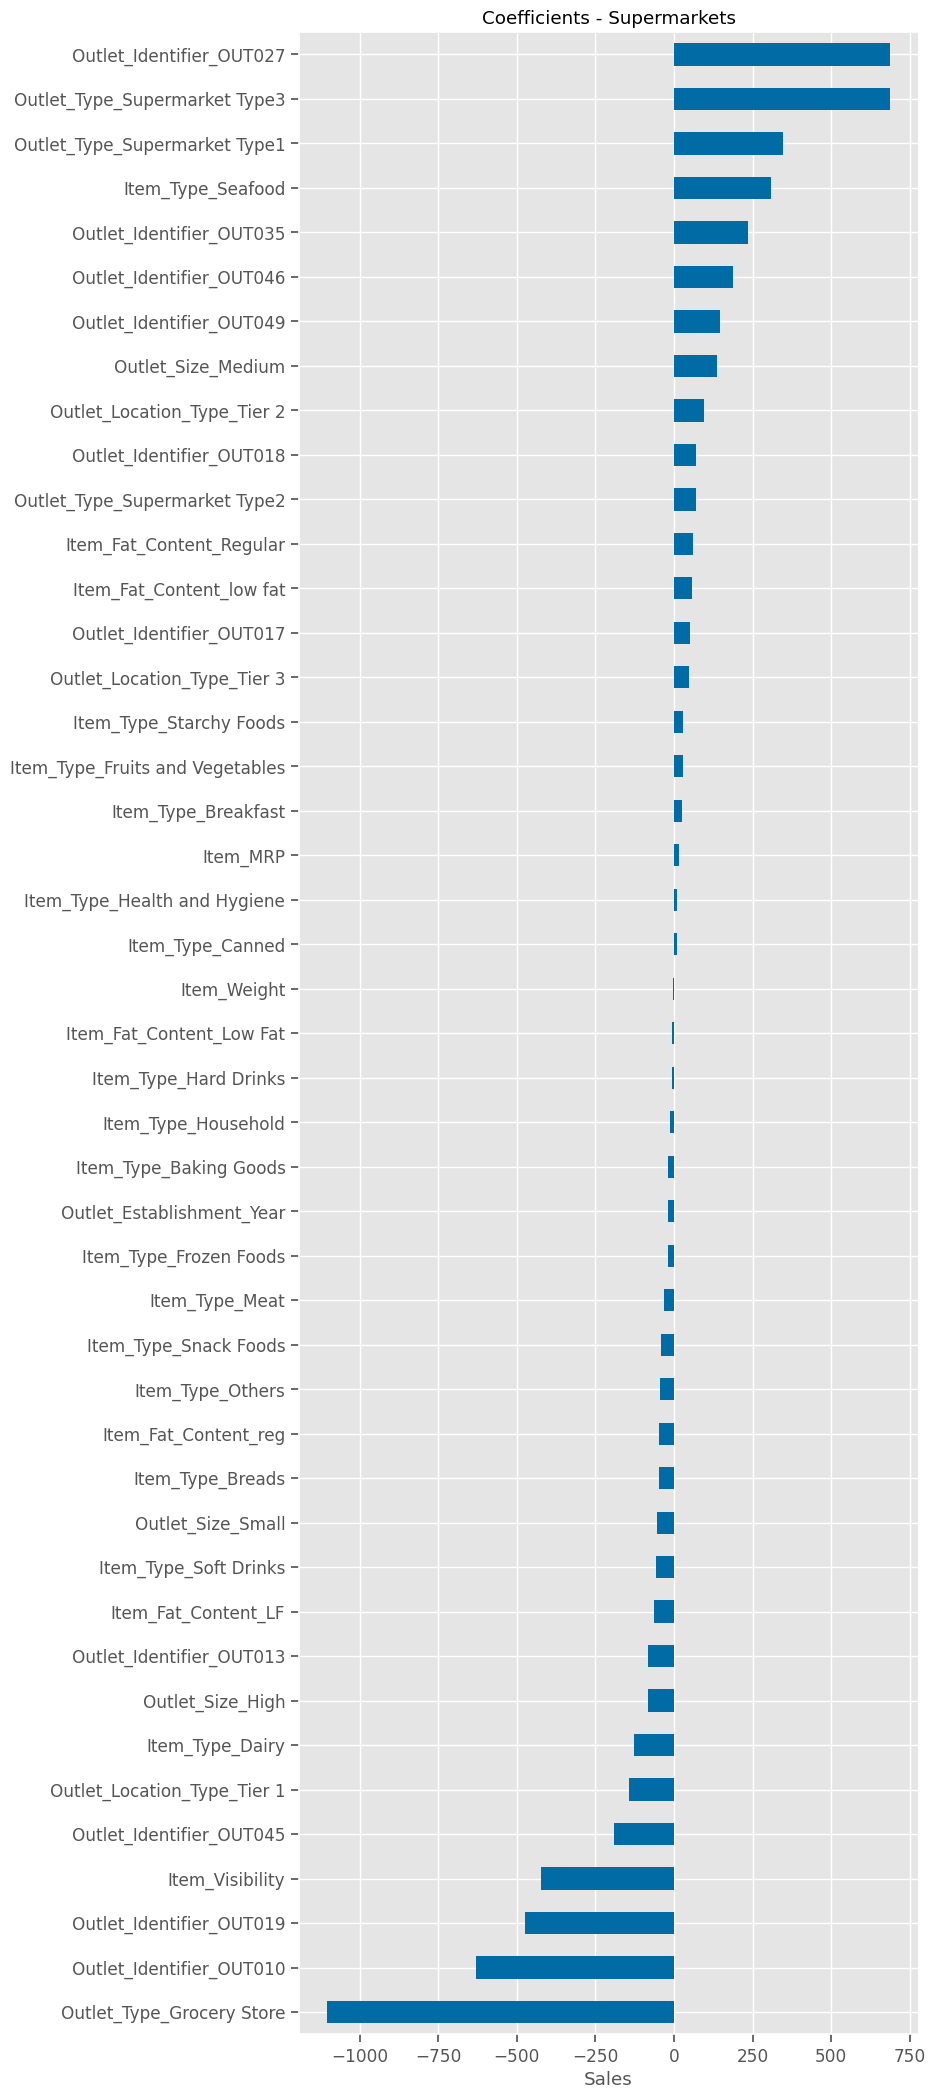

In [27]:
fig, axes = plt.subplots()
ax = coeffs.drop("intercept").sort_values().plot(kind='barh', figsize=(8,26))
ax.set(xlabel='Sales', title="Coefficients - Supermarkets");

# Top three Coefficients

Outlet_Type_Grocery Store         -1,104.3214

Outlet_Identifier_OUT010            -629.3265

Outlet_Identifier_OUT027             688.1500

For the Outlet_Type_Grocery Store, for every product sold, it would generate 1,104 fewer Rupees.

For the Outlet_Identifier_OUT010, for every product sold, it would generate 629 fewer Rupees.

For the Outlet_Identifier_OUT027, every product sold, it would generate 688 more Rupees..


# Model 2 Decision Tree Regressor

In [28]:
dec_model.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=11, random_state=42)

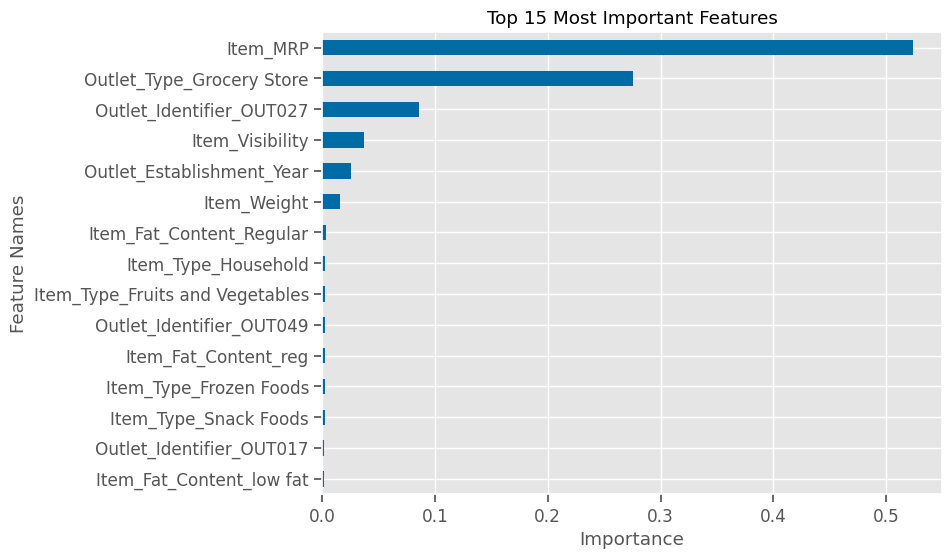

In [29]:
evaluate_regression(dec_model,X_train_processed, y_train, X_test_processed,y_test)
loaded_importances = get_importances(dec_model)
plot_importance_color(loaded_importances,top_n=15,color_dict=None);

- Top 5 Features 
1. Item_MRP
2. Outlet_Type_Grocery Store
3. Outlet_Identifier_OUT027
4. Item_Visibility
5. Outlet_Establishment_Year


# SHAP

In [30]:
import shap
shap.initjs()

In [31]:
len(X_train)

6392

In [32]:
X_shap = shap.sample(X_train_processed,nsamples=400,random_state=321)
X_shap.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
3888      15.8500           0.1107   36.9506                 2,007.0000   
2497      15.1000           0.0874  221.8456                 1,997.0000   
7723      17.5000           0.0156  184.8266                 2,002.0000   
8117      10.8000           0.0498  243.2144                 2,002.0000   
7475      15.0000           0.0450  140.4838                 2,002.0000   

      Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
3888               0.0000                    0.0000                    1.0000   
2497               0.0000                    0.0000                    1.0000   
7723               0.0000                    1.0000                    0.0000   
8117               0.0000                    1.0000                    0.0000   
7475               0.0000                    1.0000                    0.0000   

      Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
3888                    0.0000                0.0000                  0.0000   
2497                    0.0000                0.0000                  0.0000   
7723                    0.0000                0.0000                  0.0000   
8117                    0.0000                0.0000                  0.0000   
7475                    0.0000                0.0000                  0.0000   

      ...  Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
3888  ...            0.0000              1.0000             0.0000   
2497  ...            0.0000              0.0000             1.0000   
7723  ...            0.0000              1.0000             0.0000   
8117  ...            0.0000              1.0000             0.0000   
7475  ...            0.0000              1.0000             0.0000   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
3888                       0.0000                       1.0000   
2497                       1.0000                       0.0000   
7723                       0.0000                       1.0000   
8117                       0.0000                       1.0000   
7475                       0.0000                       1.0000   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
3888                       0.0000                     0.0000   
2497                       0.0000                     0.0000   
7723                       0.0000                     0.0000   
8117                       0.0000                     0.0000   
7475                       0.0000                     0.0000   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
3888                         1.0000                         0.0000   
2497                         1.0000                         0.0000   
7723                         1.0000                         0.0000   
8117                         1.0000                         0.0000   
7475                         1.0000                         0.0000   

      Outlet_Type_Supermarket Type3  
3888                         0.0000  
2497                         0.0000  
7723                         0.0000  
8117                         0.0000  
7475                         0.0000  

[5 rows x 45 columns]

In [33]:
y_shap = y_train.loc[X_shap.index]
y_shap 

3888      759.0120
2497      663.1368
7723    2,766.3990
8117    1,225.0720
7475    1,685.8056
290       569.2590
5341    1,018.6740
6755    1,318.2840
7903    1,498.0500
662     3,057.3536
5806      622.5230
2431    2,348.9424
8272    1,215.7508
7415    4,390.2852
7690    7,943.6598
2541    2,090.6120
5429    1,118.5440
4246    1,693.7952
2270      695.0952
3845    2,101.2648
3481    1,821.6288
6996      143.8128
1986    1,402.1748
3841    1,773.6912
1258      466.0600
793     2,045.3376
1150    3,038.7112
5988    2,217.1140
1675    2,007.3870
3574    1,867.5690
6172      873.5296
365     3,610.6334
1190    2,328.3026
1218      918.8040
1444      884.1824
4357    2,693.8268
830     1,358.2320
7286    1,102.5648
2466    1,800.3232
2850      744.3644
8030      364.8584
8165    4,327.7000
2035      480.7076
7679    1,438.1280
6224      761.0094
720       554.6114
7094      255.6672
3249    1,677.8160
3987    1,342.2528
819     3,942.8676
3699      415.4592
2060    1,145.1760
1050    1,09

In [34]:
## Using the entire dataset (still relatively small)
X_shap = pd.concat([X_train_processed, X_test_processed])

In [35]:
y_shap = pd.concat([y_train,y_test])
y_shap

4776      515.3292
7510    3,056.0220
5828    1,577.9460
5327    1,331.6000
4810    1,687.1372
4377      111.8544
2280    1,151.1682
8198    3,401.5722
7514    3,570.0196
3463    1,523.3504
7851    3,528.7400
4595    5,273.1360
4766    1,765.7016
1541    3,091.9752
6162      645.8260
322       958.7520
2031    2,556.6720
3847    1,657.8420
7301    3,728.4800
6820    1,258.3620
7092    1,454.1072
110       699.0900
8099    5,219.8720
4891    6,608.0650
1079    2,931.5174
8125    3,757.1094
7413    1,733.7432
5344      135.8232
2291    5,159.2842
1164    4,819.0604
2276      206.3980
1450   11,445.1020
3908    1,304.9680
5852    3,615.2940
7580      495.3552
4367    5,201.2296
6252    2,976.1260
5874    1,864.2400
2954      739.0380
2531    2,087.9488
3684      163.7868
5274    5,424.9384
5180      359.5320
2908    3,731.8090
1514    3,368.9480
7439    2,816.3340
1451    1,346.2476
2020    3,083.9856
2753      592.5620
6572    1,390.1904
4506      340.2238
7340    1,618.5598
838     3,06

In [36]:
## Resetting the index for sampled data to match shap_values integer index
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)

In [37]:
X_shap = X_shap.sort_index()
y_shap = y_shap.sort_index()
display(X_shap.head(),y_shap.head())

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0      16.3500           0.0296  256.4646                 2,009.0000   
1      15.2500           0.0000  179.7660                 2,009.0000   
2      12.3500           0.1587  157.2946                 1,999.0000   
3       7.9750           0.0146   82.3250                 2,004.0000   
4      19.3500           0.0166  120.9098                 2,002.0000   

   Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0               0.0000                    1.0000                    0.0000   
1               0.0000                    0.0000                    1.0000   
2               0.0000                    0.0000                    1.0000   
3               0.0000                    1.0000                    0.0000   
4               0.0000                    1.0000                    0.0000   

   Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
0                    0.0000                0.0000                  0.0000   
1                    0.0000                0.0000                  0.0000   
2                    0.0000                0.0000                  0.0000   
3                    0.0000                0.0000                  1.0000   
4                    0.0000                0.0000                  0.0000   

   ...  Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0  ...            0.0000              1.0000             0.0000   
1  ...            0.0000              1.0000             0.0000   
2  ...            0.0000              1.0000             0.0000   
3  ...            0.0000              0.0000             1.0000   
4  ...            0.0000              1.0000             0.0000   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                       0.0000                       0.0000   
1                       0.0000                       0.0000   
2                       1.0000                       0.0000   
3                       0.0000                       1.0000   
4                       0.0000                       1.0000   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                       1.0000                     0.0000   
1                       1.0000                     0.0000   
2                       0.0000                     0.0000   
3                       0.0000                     0.0000   
4                       0.0000                     0.0000   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                         0.0000                         1.0000   
1                         0.0000                         1.0000   
2                         1.0000                         0.0000   
3                         1.0000                         0.0000   
4                         1.0000                         0.0000   

   Outlet_Type_Supermarket Type3  
0                         0.0000  
1                         0.0000  
2                         0.0000  
3                         0.0000  
4                         0.0000  

[5 rows x 45 columns]

0     515.3292
1   3,056.0220
2   1,577.9460
3   1,331.6000
4   1,687.1372
Name: Item_Outlet_Sales, dtype: float64

In [38]:
explainer = shap.Explainer(linreg_model, X_shap)
explainer

In [39]:
shap_values = explainer(X_shap)
type(shap_values)

shap._explanation.Explanation

In [40]:
X_shap.shape

(8523, 45)

In [41]:
shap_values.shape

(8523, 45)

In [42]:
shap_values[0]

.values =
array([-2.68796553e+01,  5.92607601e-01,  1.18049171e+05,  8.61402408e+14,
        9.00446566e+11, -2.83783899e+13,  2.44797855e+13,  1.75055255e+11,
       -0.00000000e+00, -1.07970987e+13, -2.51184705e+12, -1.75294874e+12,
       -1.48887480e+13, -1.24790694e+13, -9.18932283e+12, -2.91773394e+13,
       -2.46960210e+12, -7.36875347e+12,  1.46948723e+14, -1.08861570e+12,
       -3.62126819e+12,  0.00000000e+00, -2.68439077e+13, -5.68484491e+12,
       -7.02063126e+11,  2.63085890e+13,  1.47424400e+12, -9.12724723e+11,
       -1.73815197e+14,  2.38262161e+13,  2.07280406e+13,  1.68499097e+13,
       -4.50383437e+12,  4.21283735e+13,  2.04149570e+13,  1.36913475e+13,
        2.37217446e+13, -8.49106932e+13,  1.25191425e+13,  1.55948592e+14,
        3.02791477e+13, -9.59880281e+12,  2.54642333e+14, -2.94008837e+14,
        1.44264681e+13])

.base_values =
1.6511813012067405e+17

.data =
array([1.6350000e+01, 2.9565309e-02, 2.5646460e+02, 2.0090000e+03,
       0.0000000e+00, 1.0

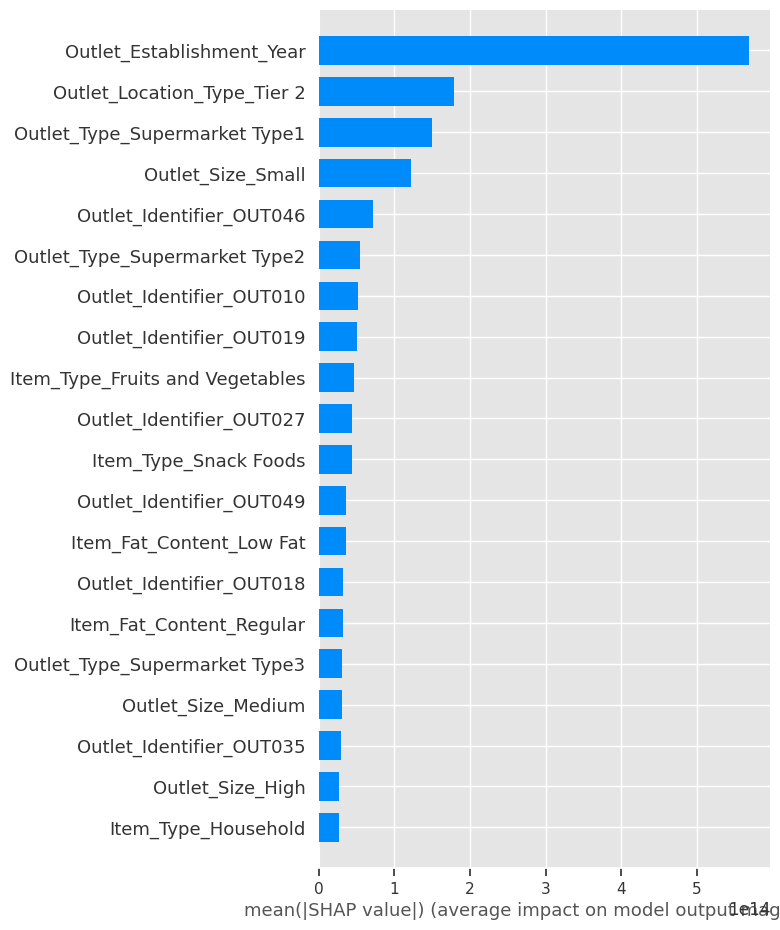

In [43]:
shap.summary_plot(shap_values, features= X_shap, plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


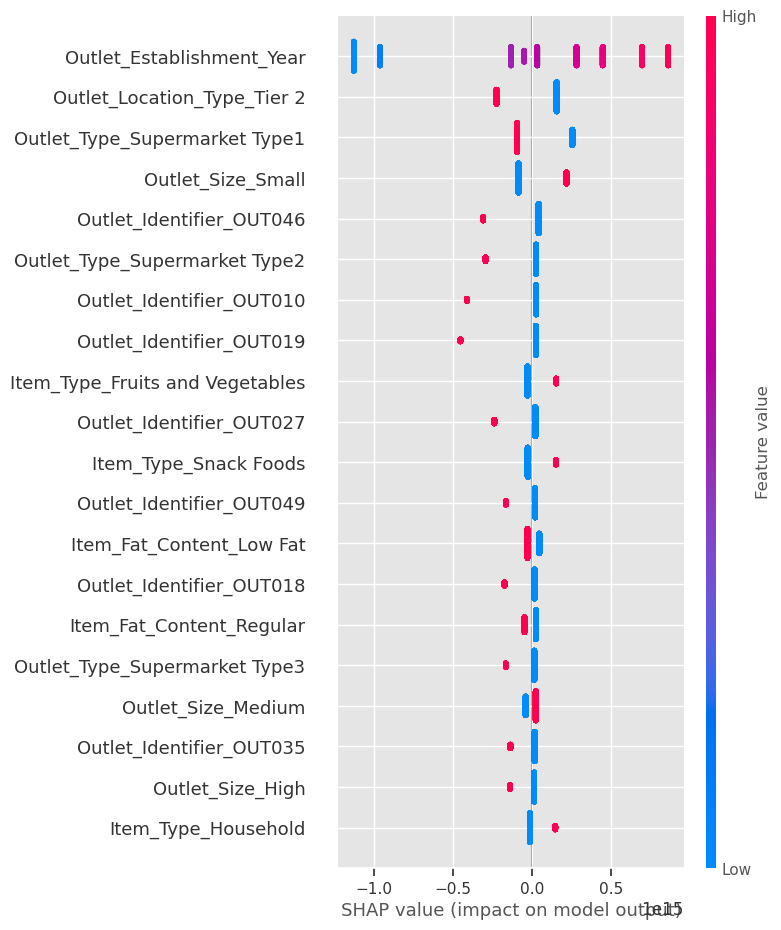

In [44]:
shap.summary_plot(shap_values,X_shap)

# Local Explanations

In [45]:
X_shap = shap.sample(X_train_processed, nsamples=400,random_state=321)
y_shap = y_train.loc[X_shap.index]

In [46]:
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

In [47]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(
    training_data=X_shap_local.values,  
    feature_names=X_shap_local.columns,
    mode='regression')
lime_explainer

In [48]:
highestselling=y_shap_local.idxmax()
highestselling

94

In [49]:
xselling=X_shap_local.iloc[highestselling]
xselling

Item_Weight                          12.9045
Item_Visibility                       0.0000
Item_MRP                            253.0356
Outlet_Establishment_Year         1,985.0000
Item_Fat_Content_LF                   0.0000
Item_Fat_Content_Low Fat              1.0000
Item_Fat_Content_Regular              0.0000
Item_Fat_Content_low fat              0.0000
Item_Fat_Content_reg                  0.0000
Item_Type_Baking Goods                0.0000
Item_Type_Breads                      0.0000
Item_Type_Breakfast                   0.0000
Item_Type_Canned                      0.0000
Item_Type_Dairy                       0.0000
Item_Type_Frozen Foods                0.0000
Item_Type_Fruits and Vegetables       1.0000
Item_Type_Hard Drinks                 0.0000
Item_Type_Health and Hygiene          0.0000
Item_Type_Household                   0.0000
Item_Type_Meat                        0.0000
Item_Type_Others                      0.0000
Item_Type_Seafood                     0.0000
Item_Type_

In [50]:
exp = lime_explainer.explain_instance(xselling, dec_model.predict)
exp.show_in_notebook()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


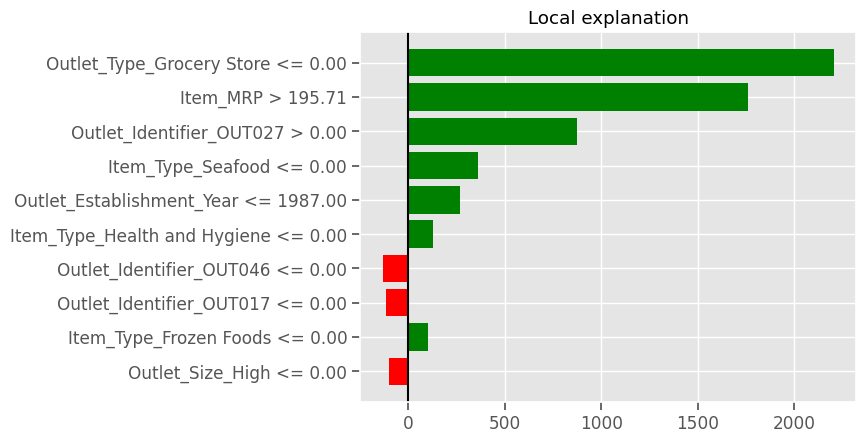

In [51]:
fig =exp.as_pyplot_figure();
axes = fig.get_axes()
axes[0].axvline(0,color='k');

In [52]:
X_shap = shap.sample(X_train_processed, nsamples=200, random_state=321)
X_shap

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
3888      15.8500           0.1107   36.9506                 2,007.0000   
2497      15.1000           0.0874  221.8456                 1,997.0000   
7723      17.5000           0.0156  184.8266                 2,002.0000   
8117      10.8000           0.0498  243.2144                 2,002.0000   
7475      15.0000           0.0450  140.4838                 2,002.0000   
290        7.2700           0.0712  113.5518                 2,002.0000   
5341      16.1000           0.1597   32.0558                 2,004.0000   
6755      17.3500           0.0277   88.0856                 1,999.0000   
7903       6.4400           0.0000   99.8700                 2,002.0000   
662       11.1000           0.1113  191.7846                 2,007.0000   
5806      12.9045           0.0140   36.7190                 1,985.0000   
2431      12.9045           0.0398   83.9908                 1,985.0000   
8272       8.8400           0.0770  112.0228                 2,007.0000   
7415      12.6000           0.0962  207.2612                 1,997.0000   
7690      12.9045           0.0888  192.2478                 1,985.0000   
2541       6.7650           0.0873  105.0306                 1,997.0000   
5429      14.0000           0.0419   54.0640                 2,004.0000   
4246      10.8500           0.1632  107.4622                 2,007.0000   
2270       7.6550           0.0319  117.7492                 1,987.0000   
3845       9.1000           0.0817  177.0054                 2,004.0000   
3481       9.1300           0.0518  150.2024                 1,987.0000   
6996       7.0750           0.0977  141.8128                 1,998.0000   
1986      16.2000           0.0194  153.7972                 2,002.0000   
3841      16.7000           0.0608   98.7384                 1,987.0000   
1258      16.8500           0.0266   93.7120                 1,999.0000   
793       12.9045           0.0350   85.1224                 1,985.0000   
1150      11.5000           0.0375  106.9254                 1,987.0000   
5988      17.0000           0.0557  220.0114                 2,007.0000   
1675      12.9045           0.0708   46.4086                 1,985.0000   
3574      15.7000           0.0276  171.1790                 1,987.0000   
6172      19.2500           0.1020   54.3956                 2,002.0000   
365        8.1000           0.1279  211.4902                 1,987.0000   
1190       6.4200           0.0537  178.3002                 2,009.0000   
1218      14.8000           0.0448   78.3670                 1,987.0000   
1444      18.2000           0.0979  221.8456                 1,998.0000   
4357       9.6950           0.1139  158.2604                 2,004.0000   
830       12.9045           0.0377   41.5480                 1,985.0000   
7286       6.1300           0.0000   60.1536                 1,987.0000   
2466      12.8000           0.0235  223.5404                 1,997.0000   
2850       7.3600           0.0526   56.3588                 2,007.0000   
8030      12.9045           0.1169  183.3292                 1,985.0000   
8165      12.9045           0.0698  214.3850                 1,985.0000   
2035      12.9045           0.0446  241.1538                 1,985.0000   
7679      12.5000           0.1122  121.1440                 2,004.0000   
6224      13.1500           0.0208   84.3566                 2,002.0000   
720       14.3000           0.0264   78.2302                 2,009.0000   
7094       9.3950           0.1097   41.3112                 2,007.0000   
3249      12.9045           0.0659   81.8960                 1,985.0000   
3987      11.1000           0.0107   82.3908                 2,002.0000   
819       16.7500           0.0450  186.4556                 1,997.0000   
3699      17.7500           0.0737   35.1216                 2,009.0000   
2060      17.6000           0.0493  115.4176                 2,007.0000   
1050       9.1950           0.0

In [53]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

3888      759.0120
2497      663.1368
7723    2,766.3990
8117    1,225.0720
7475    1,685.8056
290       569.2590
5341    1,018.6740
6755    1,318.2840
7903    1,498.0500
662     3,057.3536
5806      622.5230
2431    2,348.9424
8272    1,215.7508
7415    4,390.2852
7690    7,943.6598
2541    2,090.6120
5429    1,118.5440
4246    1,693.7952
2270      695.0952
3845    2,101.2648
3481    1,821.6288
6996      143.8128
1986    1,402.1748
3841    1,773.6912
1258      466.0600
793     2,045.3376
1150    3,038.7112
5988    2,217.1140
1675    2,007.3870
3574    1,867.5690
6172      873.5296
365     3,610.6334
1190    2,328.3026
1218      918.8040
1444      884.1824
4357    2,693.8268
830     1,358.2320
7286    1,102.5648
2466    1,800.3232
2850      744.3644
8030      364.8584
8165    4,327.7000
2035      480.7076
7679    1,438.1280
6224      761.0094
720       554.6114
7094      255.6672
3249    1,677.8160
3987    1,342.2528
819     3,942.8676
3699      415.4592
2060    1,145.1760
1050    1,09

In [54]:
## Resetting the index for sampled data to match shap_values integer index
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

In [55]:
explainer = shap.Explainer(X_shap_local,y_shap_local)
explainer

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model:      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0        15.8500           0.1107   36.9506                 2,007.0000   
1        15.1000           0.0874  221.8456                 1,997.0000   
2        17.5000           0.0156  184.8266                 2,002.0000   
3        10.8000           0.0498  243.2144                 2,002.0000   
4        15.0000           0.0450  140.4838                 2,002.0000   
5         7.2700           0.0712  113.5518                 2,002.0000   
6        16.1000           0.1597   32.0558                 2,004.0000   
7        17.3500           0.0277   88.0856                 1,999.0000   
8         6.4400           0.0000   99.8700                 2,002.0000   
9        11.1000           0.1113  191.7846                 2,007.0000   
10       12.9045           0.0140   36.7190                 1,985.0000   
11       12.9045           0.0398   83.9908                 1,985.0000   
12        8.8400           0.0770  112.0228                 2,007.0000   
13       12.6000           0.0962  207.2612                 1,997.0000   
14       12.9045           0.0888  192.2478                 1,985.0000   
15        6.7650           0.0873  105.0306                 1,997.0000   
16       14.0000           0.0419   54.0640                 2,004.0000   
17       10.8500           0.1632  107.4622                 2,007.0000   
18        7.6550           0.0319  117.7492                 1,987.0000   
19        9.1000           0.0817  177.0054                 2,004.0000   
20        9.1300           0.0518  150.2024                 1,987.0000   
21        7.0750           0.0977  141.8128                 1,998.0000   
22       16.2000           0.0194  153.7972                 2,002.0000   
23       16.7000           0.0608   98.7384                 1,987.0000   
24       16.8500           0.0266   93.7120                 1,999.0000   
25       12.9045           0.0350   85.1224                 1,985.0000   
26       11.5000           0.0375  106.9254                 1,987.0000   
27       17.0000           0.0557  220.0114                 2,007.0000   
28       12.9045           0.0708   46.4086                 1,985.0000   
29       15.7000           0.0276  171.1790                 1,987.0000   
30       19.2500           0.1020   54.3956                 2,002.0000   
31        8.1000           0.1279  211.4902                 1,987.0000   
32        6.4200           0.0537  178.3002                 2,009.0000   
33       14.8000           0.0448   78.3670                 1,987.0000   
34       18.2000           0.0979  221.8456                 1,998.0000   
35        9.6950           0.1139  158.2604                 2,004.0000   
36       12.9045           0.0377   41.5480                 1,985.0000   
37        6.1300           0.0000   60.1536                 1,987.0000   
38       12.8000           0.0235  223.5404                 1,997.0000   
39        7.3600           0.0526   56.3588                 2,007.0000   
40       12.9045           0.1169  183.3292                 1,985.0000   
41       12.9045           0.0698  214.3850                 1,985.0000   
42       12.9045           0.0446  241.1538                 1,985.0000   
43       12.5000           0.1122  121.1440                 2,004.0000   
44       13.1500           0.0208   84.3566                 2,002.0000   
45       14.3000           0.0264   78.2302                 2,009.0000   
46        9.3950           0.1097   41.3112                 2,007.0000   
47       12.9045           0.0659   81.8960                 1,985.0000   
48       11.1000           0.0107   82.3908                 2,002.0000   
49       16.7500           0.0450  186.4556                 1,997.0000   
50       17.7500           0.0737   35.1216                 2,009.0000   
51       17.6000           0.0493  115.4176                 2,007.0000   
52        9.1950           0.0644   83.1566                 2,007.0000   
53       12.9045           0.0276  149.4708                 1,985.0000   
54       13.5000           0.1290   98.4068                 1,999.0000   
55       17.7000           0.0426  165.0210                 2,002.0000   
56       17.6000           0.0535   47.8060                 2,007.0000   
57       15.7000           0.0309   42.1770                 2,007.0000   
58       12.9045           0.0855  169.2816                 1,985.0000   
59        7.7200           0.1220  121.7440                 2,009.0000   
60       10.3000           0.0111   85.8540                 1,987.0000   
61       20.7000           0.1701  183.8266                 1,999.0000   
62       15.0000           0.0268  219.8456                 1,997.0000   
63        6.8600           0.0367  229.6010                 2,009.0000   
64        7.9050           0.0100  250.4408                 1,997.0000   
65       12.5000           0.0207  199.1742                 2,004.0000   
66       10.1000           0.0468   60.6878                 2,007.0000   
67        7.2200           0.0385   62.9510                 2,009.0000   
68        7.9350           0.0173   51.4350                 2,007.0000   
69       16.0000           0.0651   76.1986                 2,004.0000   
70       19.3500           0.0627  163.3184                 2,002.0000   
71       15.0000           0.1540  105.9938                 2,004.0000   
72       12.9045           0.0210  185.1924                 1,985.0000   
73        8.3500           0.1269   74.4354                 1,997.0000   
74        6.5900           0.0438  121.4098                 1,998.0000   
75       12.9045           0.0543   96.6094                 1,985.0000   
76       20.1000           0.0000   61.3536                 1,998.0000   
77       18.3500           0.0141  224.0746                 2,002.0000   
78       16.2500           0.0871   96.0410                 1,987.0000   
79       17.2000           0.1563  162.1578                 1,997.0000   
80        8.3950           0.0719  254.8040                 1,987.0000   
81       16.2000           0.1762  184.0608                 2,007.0000   
82       12.9045           0.0244   95.9068                 1,985.0000   
83       20.7000           0.0475  215.9876                 2,004.0000   
84       18.2500           0.0542  142.0154                 1,997.0000   
85       18.7500           0.0344  215.7218                 1,999.0000   
86       19.8500           0.0052  265.1884                 1,987.0000   
87       17.6000           0.0473  120.8782                 1,999.0000   
88       19.1000           0.0453   38.8138                 2,004.0000   
89       12.9045           0.1649  255.2698                 1,985.0000   
90       10.1000           0.0561  117.8492                 1,997.0000   
91        7.1000           0.1105  172.1080                 2,009.0000   
92        8.1850           0.0387  117.1808                 1,997.0000   
93       15.8500           0.0821  177.4370                 2,009.0000   
94       12.9045           0.0000  253.0356                 1,985.0000   
95        7.1450           0.0179  160.6578                 2,007.0000   
96       14.3500           0.0170  109.8228                 1,987.0000   
97        9.2850           0.0496  246.4144                 2,007.0000   
98       16.2000           0.0166   95.8726                 1,987.0000   
99       15.3500           0.0963  197.3768                 1,987.0000   
100       8.8950           0.0000  111.9544                 2,004.0000   
101      13.3000           0.0803  232.6300                 2,007.0000   
102      18.7000           0.1046  121.4072                 1,987.0000   
103      17.8500           0.0525  123.7072                 2,007.0000   
104      17.7000           0.2261  185.7924                 1,998.0000   
105      12.9045           0.0308  122.9072                 1,985.0000   
106      16.7000           0.0387  143.8102                 2,007.0000   
107      12.6500           0.1560  239.6538                 1,997.0000   
108       9.6000           0.0245  189.2214                 1,999.0000   
109      16.6000           0.0504  117.2124                 1,999.0000   
110      16.0000           0.0899  143.4154                 1,987.0000   
111      15.2000           0.0917  229.0352                 2,004.0000   
112      20.2000           0.0964  178.5028                 1,987.0000   
113      12.3500           0.0723   49.1692                 1,987.0000   
114      11.3000           0.0564  247.8118                 1,997.0000   
115      12.9045           0.1189  188.3530                 1,985.0000   
116      12.5000           0.0189   98.8384                 2,002.0000   
117       9.3000           0.0287  195.8136                 2,007.0000   
118      13.5000           0.0216  179.6976                 2,007.0000   
119      20.6000           0.0829  119.5756                 1,987.0000   
120      10.0000           0.0458  138.5180                 2,004.0000   
121       9.6000           0.0142  190.2872                 1,999.0000   
122      15.5000           0.0425   81.5934                 1,998.0000   
123      12.9045           0.0519  121.0072                 1,985.0000   
124      12.9045           0.0691   52.3324                 1,985.0000   
125       7.7850           0.0382  103.8964                 2,002.0000   
126       9.3000           0.1112   65.7826                 1,997.0000   
127      12.1500           0.0184  254.7698                 1,999.0000   
128      10.3000           0.0588  187.8530                 1,987.0000   
129       7.8250           0.1500  158.8288                 2,004.0000   
130      12.5000           0.0714  125.7020                 1,999.0000   
131      17.6000           0.0160   44.0402                 2,004.0000   
132      15.2000           0.0000  256.0330                 1,998.0000   
133       5.7800           0.0741  262.2568                 1,997.0000   
134      13.1000           0.0757  168.4158                 1,999.0000   
135      17.7500           0.1571  240.5538                 1,999.0000   
136      18.8500           0.0406  244.0144                 2,007.0000   
137       5.6150           0.0000  121.9730                 1,997.0000   
138      11.3000           0.0667  257.2962                 1,997.0000   
139      15.5000           0.0000  147.2418                 2,009.0000   
140      17.3500           0.0277   88.0856                 1,999.0000   
141      10.3000           0.0249  170.9422                 2,004.0000   
142      16.7000           0.0701  217.8850                 1,987.0000   
143       4.8800           0.0000   53.1298                 2,004.0000   
144      16.7000           0.1195  182.7976                 1,997.0000   
145      15.6000           0.0813  110.2544                 2,002.0000   
146      12.6500           0.0762  191.3846                 2,002.0000   
147      13.0000           0.0452  174.1054                 2,007.0000   
148      13.8500           0.0260  161.5210                 2,009.0000   
149      19.8500           0.0648  123.7704                 2,007.0000   
150      18.2500           0.1840  110.1570                 2,009.0000   
151      15.7500           0.0552  195.5452                 2,009.0000   
152      12.9045           0.0000   60.2194                 1,985.0000   
153      12.9045           0.0638   46.2060                 1,985.0000   
154      17.0000           0.0555  219.8114                 1,999.0000   
155      20.2500           0.0229  240.7538                 1,987.0000   
156      12.9045           0.0678  167.7842                 1,985.0000   
157      12.9045           0.1048  150.4366                 1,985.0000   
158      10.6950           0.0578   61.4536                 1,997.0000   
159      12.9045           0.0470  112.0202                 1,985.0000   
160      12.9045           0.0131  215.9192                 1,985.0000   
161      11.6500           0.1314  151.9024                 1,987.0000   
162      12.3000           0.0694  106.3938                 2,004.0000   
163      17.8500           0.0466  125.1388                 2,004.0000   
164       5.6350           0.1037  149.9050                 2,009.0000   
165       7.8950           0.0950  101.1332                 2,009.0000   
166      17.0000           0.0266  144.2470                 2,002.0000   
167       7.2700           0.0468   99.3384                 2,007.0000   
168       5.4050           0.0539  198.2742                 2,007.0000   
169      12.9045           0.0140  222.3746                 1,985.0000   
170      12.9045           0.0723  230.2668                 1,985.0000   
171      10.0000           0.0259  265.2226                 2,002.0000   
172      11.8000           0.0772   35.7558                 2,007.0000   
173      14.3000           0.1226  122.3730                 1,997.0000   
174      12.9045           0.0255  157.5262                 1,985.0000   
175      12.9045           0.0255  157.5262                 1,985.0000   
176      21.1000           0.0290  143.3786                 1,997.0000   
177      13.6500           0.0000  229.4668                 1,999.0000   
178      12.6000           0.0317  173.2764                 2,009.0000   
179      12.9045           0.0243  114.0492                 1,985.0000   
180      16.0000           0.0570  225.0404                 1,987.0000   
181       8.3000           0.0382   87.7198                 1,997.0000   
182      20.7500           0.0836  182.2318                 2,004.0000   
183      12.8500           0.0000  155.4630                 2,004.0000   
184      12.9045           0.0240  124.9730                 1,985.0000   
185       9.1050           0.0387   33.7900                 2,007.0000   
186      12.9045           0.1108  108.5912                 1,985.0000   
187      10.1950           0.1461  196.1794                 1,999.0000   
188      14.7500           0.0330  236.6906                 2,009.0000   
189      14.1500           0.0207  124.2046                 1,997.0000   
190      12.9045           0.1217  101.2016                 1,985.0000   
191       6.7800           0.0669  186.4240                 2,009.0000   
192      12.9045           0.0942  165.7526                 1,985.0000   
193       7.2100           0.1446  102.6332                 2,004.0000   
194      16.1000           0.0343  252.3356                 1,997.0000   
195      19.8500           0.0459  127.1020                 2,009.0000   
196       9.1950           0.1225  100.1016                 1,999.0000   
197      13.6500           0.0777   55.0930                 2,007.0000   
198      15.2000           0.0337  110.9912                 2,009.0000   
199      10.6000           0.0951  232.4642                 1,998.0000   

     Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                 0.0000                    0.0000                    1.0000   
1                 0.0000                    0.0000                    1.0000   
2                 0.0000                    1.0000                    0.0000   
3                 0.0000                    1.0000                    0.0000   
4                 0.0000                    1.0000                    0.0000   
5                 0.0000                    1.0000                    0.0000   
6                 0.0000                    0.0000                    1.0000   
7                 0.0000                    0.0000                    1.0000   
8                 0.0000                    0.0000                    0.0000   
9                 0.0000                    1.0000                    0.0000   
10                0.0000                    1.0000                    0.0000   
11                0.0000                    1.0000                    0.0000   
12                0.0000                    0.0000                    1.0000   
13                0.0000                    1.0000                    0.0000   
14                0.0000                    1.0000                    0.0000   
15                0.0000                    0.0000                    1.0000   
16                0.0000                    0.0000                    1.0000   
17                0.0000                    1.0000                    0.0000   
18                0.0000                    1.0000                    0.0000   
19                0.0000                    0.0000                    1.0000   
20                0.0000                    1.0000                    0.0000   
21                0.0000                    1.0000                    0.0000   
22                0.0000                    1.0000                    0.0000   
23                0.0000                    0.0000                    1.0000   
24                0.0000                    0.0000                    1.0000   
25                0.0000                    1.0000                    0.0000   
26                0.0000                    0.0000                    1.0000   
27                0.0000                    1.0000                    0.0000   
28                0.0000                    1.0000                    0.0000   
29                0.0000                    0.0000                    1.0000   
30                1.0000                    0.0000                    0.0000   
31                0.0000                    1.0000                    0.0000   
32                0.0000                    1.0000                    0.0000   
33                0.0000                    1.0000                    0.0000   
34                0.0000                    1.0000                    0.0000   
35                0.0000                    1.0000                    0.0000   
36                0.0000                    1.0000                    0.0000   
37                0.0000                    1.0000                    0.0000   
38                0.0000                    0.0000                    1.0000   
39                0.0000                    1.0000                    0.0000   
40                0.0000                    1.0000                    0.0000   
41                0.0000                    1.0000                    0.0000   
42                0.0000                    1.0000                    0.0000   
43                0.0000                    1.0000                    0.0000   
44                0.0000                    1.0000                    0.0000   
45                0.0000                    1.0000                    0.0000   
46                0.0000                    0.0000                    1.0000   
47                0.0000                    0.0000                    1.0000   
48                0.0000                    1.0000                    0.0000   
49                0.0000                    1.0000                    0.0000   
50                1.0000                    0.0000                    0.0000   
51                0.0000                    1.0000                    0.0000   
52                0.0000                    0.0000                    1.0000   
53                0.0000                    1.0000                    0.0000   
54                0.0000                    0.0000                    1.0000   
55                0.0000                    0.0000                    1.0000   
56                0.0000                    0.0000                    1.0000   
57                0.0000                    1.0000                    0.0000   
58                0.0000                    1.0000                    0.0000   
59                0.0000                    1.0000                    0.0000   
60                0.0000                    0.0000                    1.0000   
61                0.0000                    1.0000                    0.0000   
62                0.0000                    0.0000                    1.0000   
63                0.0000                    1.0000                    0.0000   
64                0.0000                    1.0000                    0.0000   
65                0.0000                    1.0000                    0.0000   
66                0.0000                    1.0000                    0.0000   
67                0.0000                    0.0000                    1.0000   
68                0.0000                    1.0000                    0.0000   
69                0.0000                    0.0000                    1.0000   
70                0.0000                    0.0000                    1.0000   
71                0.0000                    1.0000                    0.0000   
72                0.0000                    0.0000                    1.0000   
73                0.0000                    0.0000                    1.0000   
74                0.0000                    1.0000                    0.0000   
75                0.0000                    0.0000                    1.0000   
76                0.0000                    1.0000                    0.0000   
77                0.0000                    1.0000                    0.0000   
78                0.0000                    1.0000                    0.0000   
79                0.0000                    1.0000                    0.0000   
80                0.0000                    1.0000                    0.0000   
81                0.0000                    1.0000                    0.0000   
82                0.0000                    0.0000                    1.0000   
83                0.0000                    0.0000                    1.0000   
84                0.0000                    1.0000                    0.0000   
85                0.0000                    1.0000                    0.0000   
86                0.0000                    1.0000                    0.0000   
87                0.0000                    0.0000                    1.0000   
88                0.0000                    1.0000                    0.0000   
89                0.0000                    1.0000                    0.0000   
90                0.0000                    1.0000                    0.0000   
91                1.0000                    0.0000                    0.0000   
92                0.0000                    1.0000                    0.0000   
93                0.0000                    1.0000                    0.0000   
94                0.0000                    1.0000                    0.0000   
95                0.0000                    1.0000                    0.0000   
96                0.0000                    1.0000                    0.0000   
97                0.0000                    0.0000                    1.0000   
98                0.0000                    0.0000                    1.0000   
99                0.0000                    1.0000                    0.0000   
100               0.0000                    1.0000                    0.0000   
101               0.0000                    1.0000                    0.0000   
102               0.0000                    1.0000                    0.0000   
103               0.0000                    1.0000                    0.0000   
104               0.0000                    0.0000                    1.0000   
105               0.0000                    0.0000                    1.0000   
106               0.0000                    0.0000                    1.0000   
107               0.0000                    0.0000                    1.0000   
108               0.0000                    1.0000                    0.0000   
109               0.0000                    1.0000                    0.0000   
110               0.0000                    1.0000                    0.0000   
111               0.0000                    1.0000                    0.0000   
112               0.0000                    0.0000                    1.0000   
113               0.0000                    0.0000                    1.0000   
114               1.0000                    0.0000                    0.0000   
115               0.0000                    1.0000                    0.0000   
116               0.0000                    1.0000                    0.0000   
117               0.0000                    1.0000                    0.0000   
118               0.0000                    0.0000                    0.0000   
119               0.0000                    1.0000                    0.0000   
120               0.0000                    1.0000                    0.0000   
121               0.0000                    0.0000                    1.0000   
122               0.0000                    0.0000                    1.0000   
123               0.0000                    1.0000                    0.0000   
124               0.0000                    1.0000                    0.0000   
125               0.0000                    0.0000                    1.0000   
126               0.0000                    0.0000                    0.0000   
127               0.0000                    1.0000                    0.0000   
128               0.0000                    0.0000                    1.0000   
129               0.0000                    0.0000                    1.0000   
130               0.0000                    1.0000                    0.0000   
131               0.0000                    0.0000                    1.0000   
132               0.0000                    1.0000                    0.0000   
133               0.0000                    0.0000                    1.0000   
134               0.0000                    1.0000                    0.0000   
135               0.0000                    0.0000                    1.0000   
136               0.0000                    1.0000                    0.0000   
137               1.0000                    0.0000                    0.0000   
138               0.0000                    0.0000                    1.0000   
139               0.0000                    0.0000                    1.0000   
140               0.0000                    0.0000                    1.0000   
141               0.0000                    0.0000                    1.0000   
142               0.0000                    0.0000                    0.0000   
143               0.0000                    0.0000                    1.0000   
144               0.0000                    0.0000                    1.0000   
145               0.0000                    1.0000                    0.0000   
146               0.0000                    0.0000                    1.0000   
147               0.0000                    0.0000                    1.0000   
148               0.0000                    0.0000                    0.0000   
149               0.0000                    1.0000                    0.0000   
150               0.0000                    0.0000                    1.0000   
151               0.0000                    1.0000                    0.0000   
152               0.0000                    0.0000                    1.0000   
153               0.0000                    1.0000                    0.0000   
154               0.0000                    1.0000                    0.0000   
155               0.0000                    0.0000                    1.0000   
156               0.0000                    1.0000                    0.0000   
157               0.0000                    1.0000                    0.0000   
158               1.0000                    0.0000                    0.0000   
159               0.0000                    1.0000                    0.0000   
160               0.0000                    1.0000                    0.0000   
161               0.0000                    1.0000                    0.0000   
162               0.0000                    1.0000                    0.0000   
163               0.0000                    0.0000                    1.0000   
164               0.0000                    1.0000                    0.0000   
165               0.0000                    0.0000                    1.0000   
166               0.0000                    0.0000                    1.0000   
167               0.0000                    1.0000                    0.0000   
168               0.0000                    0.0000                    1.0000   
169               0.0000                    1.0000                    0.0000   
170               0.0000                    1.0000                    0.0000   
171               0.0000                    1.0000                    0.0000   
172               0.0000                    0.0000                    1.0000   
173               0.0000                    1.0000                    0.0000   
174               0.0000                    1.0000                    0.0000   
175               0.0000                    1.0000                    0.0000   
176               0.0000                    1.0000                    0.0000   
177               0.0000                    1.0000                    0.0000   
178               0.0000                    0.0000                    1.0000   
179               0.0000                    1.0000                    0.0000   
180               0.0000                    1.0000                    0.0000   
181               0.0000                    0.0000                    1.0000   
182               0.0000                    0.0000                    1.0000   
183               0.0000                    1.0000                    0.0000   
184               0.0000                    1.0000                    0.0000   
185               0.0000                    1.0000                    0.0000   
186               0.0000                    1.0000                    0.0000   
187               0.0000                    0.0000                    1.0000   
188               0.0000                    1.0000                    0.0000   
189               1.0000                    0.0000                    0.0000   
190               0.0000                    0.0000                    1.0000   
191               0.0000                    1.0000                    0.0000   
192               0.0000                    0.0000                    1.0000   
193               0.0000                    0.0000                    1.0000   
194               0.0000                    1.0000                    0.0000   
195               0.0000                    1.0000                    0.0000   
196               0.0000                    0.0000                    1.0000   
197               0.0000                    1.0000                    0.0000   
198               0.0000                    1.0000                    0.0000   
199               0.0000                    1.0000                    0.0000   

     Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
0                      0.0000                0.0000                  0.0000   
1                      0.0000                0.0000                  0.0000   
2                      0.0000                0.0000                  0.0000   
3                      0.0000                0.0000                  0.0000   
4                      0.0000                0.0000                  0.0000   
5                      0.0000                0.0000                  0.0000   
6                      0.0000                0.0000                  0.0000   
7                      0.0000                0.0000                  0.0000   
8                      1.0000                0.0000                  0.0000   
9                      0.0000                0.0000                  0.0000   
10                     0.0000                0.0000                  0.0000   
11                     0.0000                0.0000                  0.0000   
12                     0.0000                0.0000                  0.0000   
13                     0.0000                0.0000                  0.0000   
14                     0.0000                0.0000                  0.0000   
15                     0.0000                0.0000                  0.0000   
16                     0.0000                0.0000                  0.0000   
17                     0.0000                0.0000                  0.0000   
18                     0.0000                0.0000                  0.0000   
19                     0.0000                0.0000                  0.0000   
20                     0.0000                0.0000                  0.0000   
21                     0.0000                0.0000                  0.0000   
22                     0.0000                0.0000                  0.0000   
23                     0.0000                0.0000                  1.0000   
24                     0.0000                0.0000                  0.0000   
25                     0.0000                0.0000                  0.0000   
26                     0.0000                0.0000                  0.0000   
27                     0.0000                0.0000                  0.0000   
28                     0.0000                0.0000                  0.0000   
29                     0.0000                0.0000                  0.0000   
30                     0.0000                0.0000                  0.0000   
31                     0.0000                0.0000                  0.0000   
32                     0.0000                0.0000                  0.0000   
33                     0.0000                0.0000                  0.0000   
34                     0.0000                0.0000                  0.0000   
35                     0.0000                0.0000                  0.0000   
36                     0.0000                0.0000                  0.0000   
37                     0.0000                0.0000                  0.0000   
38                     0.0000                0.0000                  0.0000   
39                     0.0000                0.0000                  0.0000   
40                     0.0000                0.0000                  0.0000   
41                     0.0000                0.0000                  0.0000   
42                     0.0000                0.0000                  0.0000   
43                     0.0000                0.0000                  0.0000   
44                     0.0000                0.0000                  0.0000   
45                     0.0000                0.0000                  0.0000   
46                     0.0000                0.0000                  0.0000   
47                     0.0000                0.0000                  0.0000   
48                     0.0000                0.0000                  0.0000   
49                     0.0000                0.0000                  0.0000   
50                     0.0000                0.0000                  0.0000   
51                     0.0000                0.0000                  0.0000   
52                     0.0000                0.0000                  0.0000   
53                     0.0000                0.0000                  1.0000   
54                     0.0000                0.0000                  0.0000   
55                     0.0000                0.0000                  0.0000   
56                     0.0000                0.0000                  0.0000   
57                     0.0000                0.0000                  0.0000   
58                     0.0000                0.0000                  0.0000   
59                     0.0000                0.0000                  0.0000   
60                     0.0000                0.0000                  0.0000   
61                     0.0000                0.0000                  0.0000   
62                     0.0000                0.0000                  1.0000   
63                     0.0000                0.0000                  0.0000   
64                     0.0000                0.0000                  0.0000   
65                     0.0000                0.0000                  0.0000   
66                     0.0000                0.0000                  0.0000   
67                     0.0000                0.0000                  1.0000   
68                     0.0000                0.0000                  0.0000   
69                     0.0000                0.0000                  0.0000   
70                     0.0000                0.0000                  1.0000   
71                     0.0000                0.0000                  0.0000   
72                     0.0000                0.0000                  0.0000   
73                     0.0000                0.0000                  0.0000   
74                     0.0000                0.0000                  0.0000   
75                     0.0000                0.0000                  0.0000   
76                     0.0000                0.0000                  0.0000   
77                     0.0000                0.0000                  0.0000   
78                     0.0000                0.0000                  0.0000   
79                     0.0000                0.0000                  0.0000   
80                     0.0000                0.0000                  0.0000   
81                     0.0000                0.0000                  0.0000   
82                     0.0000                0.0000                  0.0000   
83                     0.0000                0.0000                  0.0000   
84                     0.0000                0.0000                  0.0000   
85                     0.0000                0.0000                  0.0000   
86                     0.0000                0.0000                  0.0000   
87                     0.0000                0.0000                  0.0000   
88                     0.0000                0.0000                  0.0000   
89                     0.0000                0.0000                  0.0000   
90                     0.0000                0.0000                  0.0000   
91                     0.0000                0.0000                  0.0000   
92                     0.0000                0.0000                  0.0000   
93                     0.0000                0.0000                  0.0000   
94                     0.0000                0.0000                  0.0000   
95                     0.0000                0.0000                  0.0000   
96                     0.0000                0.0000                  0.0000   
97                     0.0000                0.0000                  0.0000   
98                     0.0000                0.0000                  0.0000   
99                     0.0000                0.0000                  0.0000   
100                    0.0000                0.0000                  0.0000   
101                    0.0000                0.0000                  0.0000   
102                    0.0000                0.0000                  0.0000   
103                    0.0000                0.0000                  0.0000   
104                    0.0000                0.0000                  0.0000   
105                    0.0000                0.0000                  0.0000   
106                    0.0000                0.0000                  0.0000   
107                    0.0000                0.0000                  0.0000   
108                    0.0000                0.0000                  0.0000   
109                    0.0000                0.0000                  0.0000   
110                    0.0000                0.0000                  0.0000   
111                    0.0000                0.0000                  0.0000   
112                    0.0000                0.0000                  0.0000   
113                    0.0000                0.0000                  0.0000   
114                    0.0000                0.0000                  1.0000   
115                    0.0000                0.0000                  0.0000   
116                    0.0000                0.0000                  0.0000   
117                    0.0000                0.0000                  1.0000   
118                    1.0000                0.0000                  0.0000   
119                    0.0000                0.0000                  1.0000   
120                    0.0000                0.0000                  0.0000   
121                    0.0000                0.0000                  0.0000   
122                    0.0000                0.0000                  1.0000   
123                    0.0000                0.0000                  0.0000   
124                    0.0000                0.0000                  0.0000   
125                    0.0000                0.0000                  0.0000   
126                    1.0000                0.0000                  0.0000   
127                    0.0000                0.0000                  0.0000   
128                    0.0000                0.0000                  0.0000   
129                    0.0000                0.0000                  0.0000   
130                    0.0000                0.0000                  0.0000   
131                    0.0000                0.0000                  0.0000   
132                    0.0000                0.0000                  0.0000   
133                    0.0000                0.0000                  0.0000   
134                    0.0000                0.0000                  0.0000   
135                    0.0000                0.0000                  0.0000   
136                    0.0000                0.0000                  0.0000   
137                    0.0000                0.0000                  0.0000   
138                    0.0000                0.0000                  0.0000   
139                    0.0000                0.0000                  0.0000   
140                    0.0000                0.0000                  0.0000   
141                    0.0000                0.0000                  1.0000   
142                    1.0000                0.0000                  0.0000   
143                    0.0000                0.0000                  1.0000   
144                    0.0000                0.0000                  0.0000   
145                    0.0000                0.0000                  1.0000   
146                    0.0000                0.0000                  0.0000   
147                    0.0000                0.0000                  0.0000   
148                    0.0000                1.0000                  0.0000   
149                    0.0000                0.0000                  0.0000   
150                    0.0000                0.0000                  0.0000   
151                    0.0000                0.0000                  1.0000   
152                    0.0000                0.0000                  0.0000   
153                    0.0000                0.0000                  0.0000   
154                    0.0000                0.0000                  0.0000   
155                    0.0000                0.0000                  1.0000   
156                    0.0000                0.0000                  0.0000   
157                    0.0000                0.0000                  0.0000   
158                    0.0000                0.0000                  0.0000   
159                    0.0000                0.0000                  0.0000   
160                    0.0000                0.0000                  0.0000   
161                    0.0000                0.0000                  1.0000   
162                    0.0000                0.0000                  0.0000   
163                    0.0000                0.0000                  0.0000   
164                    0.0000                0.0000                  1.0000   
165                    0.0000                0.0000                  0.0000   
166                    0.0000                0.0000                  0.0000   
167                    0.0000                0.0000                  0.0000   
168                    0.0000                0.0000                  0.0000   
169                    0.0000                0.0000                  0.0000   
170                    0.0000                0.0000                  0.0000   
171                    0.0000                0.0000                  0.0000   
172                    0.0000                0.0000                  0.0000   
173                    0.0000                0.0000                  0.0000   
174                    0.0000                0.0000                  0.0000   
175                    0.0000                0.0000                  0.0000   
176                    0.0000                0.0000                  0.0000   
177                    0.0000                0.0000                  0.0000   
178                    0.0000                0.0000                  1.0000   
179                    0.0000                0.0000                  0.0000   
180                    0.0000                0.0000                  0.0000   
181                    0.0000                0.0000                  0.0000   
182                    0.0000                0.0000                  0.0000   
183                    0.0000                0.0000                  0.0000   
184                    0.0000                0.0000                  0.0000   
185                    0.0000                0.0000                  0.0000   
186                    0.0000                0.0000                  0.0000   
187                    0.0000                0.0000                  0.0000   
188                    0.0000                0.0000                  0.0000   
189                    0.0000                0.0000                  0.0000   
190                    0.0000                0.0000                  0.0000   
191                    0.0000                0.0000                  0.0000   
192                    0.0000                0.0000                  0.0000   
193                    0.0000                0.0000                  0.0000   
194                    0.0000                0.0000                  0.0000   
195                    0.0000                0.0000                  0.0000   
196                    0.0000                0.0000                  0.0000   
197                    0.0000                0.0000                  0.0000   
198                    0.0000                0.0000                  0.0000   
199                    0.0000                0.0000                  0.0000   

     ...  Outlet_Size_High  Outlet_Size_Medium  Outlet_Size_Small  \
0    ...            0.0000              1.0000             0.0000   
1    ...            0.0000              0.0000             1.0000   
2    ...            0.0000              1.0000             0.0000   
3    ...            0.0000              1.0000             0.0000   
4    ...            0.0000              1.0000             0.0000   
5    ...            0.0000              1.0000             0.0000   
6    ...            0.0000              0.0000             1.0000   
7    ...            0.0000              1.0000             0.0000   
8    ...            0.0000              1.0000             0.0000   
9    ...            0.0000              1.0000             0.0000   
10   ...            0.0000              1.0000             0.0000   
11   ...            0.0000              1.0000             0.0000   
12   ...            0.0000              1.0000             0.0000   
13   ...            0.0000              0.0000             1.0000   
14   ...            0.0000              1.0000             0.0000   
15   ...            0.0000              0.0000             1.0000   
16   ...            0.0000              0.0000             1.0000   
17   ...            0.0000              1.0000             0.0000   
18   ...            1.0000              0.0000             0.0000   
19   ...            0.0000              0.0000             1.0000   
20   ...            1.0000              0.0000             0.0000   
21   ...            0.0000              1.0000             0.0000   
22   ...            0.0000              1.0000             0.0000   
23   ...            1.0000              0.0000             0.0000   
24   ...            0.0000              1.0000             0.0000   
25   ...            0.0000              1.0000             0.0000   
26   ...            1.0000              0.0000             0.0000   
27   ...            0.0000              1.0000             0.0000   
28   ...            0.0000              1.0000             0.0000   
29   ...            1.0000              0.0000             0.0000   
30   ...            0.0000              1.0000             0.0000   
31   ...            1.0000              0.0000             0.0000   
32   ...            0.0000              1.0000             0.0000   
33   ...            1.0000              0.0000             0.0000   
34   ...            0.0000              1.0000             0.0000   
35   ...            0.0000              0.0000             1.0000   
36   ...            0.0000              1.0000             0.0000   
37   ...            1.0000              0.0000             0.0000   
38   ...            0.0000              0.0000             1.0000   
39   ...            0.0000              1.0000             0.0000   
40   ...            0.0000              0.0000             1.0000   
41   ...            0.0000              1.0000             0.0000   
42   ...            0.0000              0.0000             1.0000   
43   ...            0.0000              0.0000             1.0000   
44   ...            0.0000              1.0000             0.0000   
45   ...            0.0000              1.0000             0.0000   
46   ...            0.0000              1.0000             0.0000   
47   ...            0.0000              1.0000             0.0000   
48   ...            0.0000              1.0000             0.0000   
49   ...            0.0000              0.0000             1.0000   
50   ...            0.0000              1.0000             0.0000   
51   ...            0.0000              1.0000             0.0000   
52   ...            0.0000              1.0000             0.0000   
53   ...            0.0000              1.0000             0.0000   
54   ...            0.0000              1.0000             0.0000   
55   ...            0.0000              1.0000             0.0000   
56   ...            0.0000              1.0000             0.0000   
57   ...            0.0000              1.0000             0.0000   
58   ...            0.0000              1.0000             0.0000   
59   ...            0.0000              1.0000             0.0000   
60   ...            1.0000              0.0000             0.0000   
61   ...            0.0000              1.0000             0.0000   
62   ...            0.0000              0.0000             1.0000   
63   ...            0.0000              1.0000             0.0000   
64   ...            0.0000              0.0000             1.0000   
65   ...            0.0000              0.0000             1.0000   
66   ...            0.0000              1.0000             0.0000   
67   ...            0.0000              1.0000             0.0000   
68   ...            0.0000              1.0000             0.0000   
69   ...            0.0000              0.0000             1.0000   
70   ...            0.0000              1.0000             0.0000   
71   ...            0.0000              0.0000             1.0000   
72   ...            0.0000              0.0000             1.0000   
73   ...            0.0000              0.0000             1.0000   
74   ...            0.0000              1.0000             0.0000   
75   ...            0.0000              1.0000             0.0000   
76   ...            0.0000              1.0000             0.0000   
77   ...            0.0000              1.0000             0.0000   
78   ...            1.0000              0.0000             0.0000   
79   ...            0.0000              0.0000             1.0000   
80   ...            1.0000              0.0000             0.0000   
81   ...            0.0000              1.0000             0.0000   
82   ...            0.0000              1.0000             0.0000   
83   ...            0.0000              0.0000             1.0000   
84   ...            0.0000              0.0000             1.0000   
85   ...            0.0000              1.0000             0.0000   
86   ...            1.0000              0.0000             0.0000   
87   ...            0.0000              1.0000             0.0000   
88   ...            0.0000              0.0000             1.0000   
89   ...            0.0000              0.0000             1.0000   
90   ...            0.0000              0.0000             1.0000   
91   ...            0.0000              1.0000             0.0000   
92   ...            0.0000              0.0000             1.0000   
93   ...            0.0000              1.0000             0.0000   
94   ...            0.0000              1.0000             0.0000   
95   ...            0.0000              1.0000             0.0000   
96   ...            1.0000              0.0000             0.0000   
97   ...            0.0000              1.0000             0.0000   
98   ...            1.0000              0.0000             0.0000   
99   ...            1.0000              0.0000             0.0000   
100  ...            0.0000              0.0000             1.0000   
101  ...            0.0000              1.0000             0.0000   
102  ...            1.0000              0.0000             0.0000   
103  ...            0.0000              1.0000             0.0000   
104  ...            0.0000              1.0000             0.0000   
105  ...            0.0000              1.0000             0.0000   
106  ...            0.0000              1.0000             0.0000   
107  ...            0.0000              0.0000             1.0000   
108  ...            0.0000              1.0000             0.0000   
109  ...            0.0000              1.0000             0.0000   
110  ...            1.0000              0.0000             0.0000   
111  ...            0.0000              0.0000             1.0000   
112  ...            1.0000              0.0000             0.0000   
113  ...            1.0000              0.0000             0.0000   
114  ...            0.0000              0.0000             1.0000   
115  ...            0.0000              1.0000             0.0000   
116  ...            0.0000              1.0000             0.0000   
117  ...            0.0000              1.0000             0.0000   
118  ...            0.0000              1.0000             0.0000   
119  ...            1.0000              0.0000             0.0000   
120  ...            0.0000              0.0000             1.0000   
121  ...            0.0000              1.0000             0.0000   
122  ...            0.0000              1.0000             0.0000   
123  ...            0.0000              1.0000             0.0000   
124  ...            0.0000              1.0000             0.0000   
125  ...            0.0000              1.0000             0.0000   
126  ...            0.0000              0.0000             1.0000   
127  ...            0.0000              1.0000             0.0000   
128  ...            1.0000              0.0000             0.0000   
129  ...            0.0000              0.0000             1.0000   
130  ...            0.0000              1.0000             0.0000   
131  ...            0.0000              0.0000             1.0000   
132  ...            0.0000              1.0000             0.0000   
133  ...            0.0000              0.0000             1.0000   
134  ...            0.0000              1.0000             0.0000   
135  ...            0.0000              1.0000             0.0000   
136  ...            0.0000              1.0000             0.0000   
137  ...            0.0000              0.0000             1.0000   
138  ...            0.0000              0.0000             1.0000   
139  ...            0.0000              1.0000             0.0000   
140  ...            0.0000              1.0000             0.0000   
141  ...            0.0000              0.0000             1.0000   
142  ...            1.0000              0.0000             0.0000   
143  ...            0.0000              0.0000             1.0000   
144  ...            0.0000              0.0000             1.0000   
145  ...            0.0000              1.0000             0.0000   
146  ...            0.0000              1.0000             0.0000   
147  ...            0.0000              1.0000             0.0000   
148  ...            0.0000              1.0000             0.0000   
149  ...            0.0000              1.0000             0.0000   
150  ...            0.0000              1.0000             0.0000   
151  ...            0.0000              1.0000             0.0000   
152  ...            0.0000              1.0000             0.0000   
153  ...            0.0000              1.0000             0.0000   
154  ...            0.0000              1.0000             0.0000   
155  ...            1.0000              0.0000             0.0000   
156  ...            0.0000              0.0000             1.0000   
157  ...            0.0000              0.0000             1.0000   
158  ...            0.0000              0.0000             1.0000   
159  ...            0.0000              1.0000             0.0000   
160  ...            0.0000              1.0000             0.0000   
161  ...            1.0000              0.0000             0.0000   
162  ...            0.0000              0.0000             1.0000   
163  ...            0.0000              0.0000             1.0000   
164  ...            0.0000              1.0000             0.0000   
165  ...            0.0000              1.0000             0.0000   
166  ...            0.0000              1.0000             0.0000   
167  ...            0.0000              1.0000             0.0000   
168  ...            0.0000              1.0000             0.0000   
169  ...            0.0000              1.0000             0.0000   
170  ...            0.0000              1.0000             0.0000   
171  ...            0.0000              1.0000             0.0000   
172  ...            0.0000              1.0000             0.0000   
173  ...            0.0000              0.0000             1.0000   
174  ...            0.0000              0.0000             1.0000   
175  ...            0.0000              0.0000             1.0000   
176  ...            0.0000              0.0000             1.0000   
177  ...            0.0000              1.0000             0.0000   
178  ...            0.0000              1.0000             0.0000   
179  ...            0.0000              1.0000             0.0000   
180  ...            1.0000              0.0000             0.0000   
181  ...            0.0000              0.0000             1.0000   
182  ...            0.0000              0.0000             1.0000   
183  ...            0.0000              0.0000             1.0000   
184  ...            0.0000              1.0000             0.0000   
185  ...            0.0000              1.0000             0.0000   
186  ...            0.0000              1.0000             0.0000   
187  ...            0.0000              1.0000             0.0000   
188  ...            0.0000              1.0000             0.0000   
189  ...            0.0000              0.0000             1.0000   
190  ...            0.0000              1.0000             0.0000   
191  ...            0.0000              1.0000             0.0000   
192  ...            0.0000              0.0000             1.0000   
193  ...            0.0000              0.0000             1.0000   
194  ...            0.0000              0.0000             1.0000   
195  ...            0.0000              1.0000             0.0000   
196  ...            0.0000              1.0000             0.0000   
197  ...            0.0000              1.0000             0.0000   
198  ...            0.0000              1.0000             0.0000   
199  ...            0.0000              1.0000             0.0000   

     Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                         0.0000                       1.0000   
1                         1.0000                       0.0000   
2                         0.0000                       1.0000   
3                         0.0000                       1.0000   
4                         0.0000                       1.0000   
5                         0.0000                       1.0000   
6                         0.0000                       1.0000   
7                         1.0000                       0.0000   
8                         0.0000                       1.0000   
9                         0.0000                       1.0000   
10                        0.0000                       0.0000   
11                        0.0000                       0.0000   
12                        0.0000                       1.0000   
13                        1.0000                       0.0000   
14                        0.0000                       0.0000   
15                        1.0000                       0.0000   
16                        0.0000                       1.0000   
17                        0.0000                       1.0000   
18                        0.0000                       0.0000   
19                        0.0000                       1.0000   
20                        0.0000                       0.0000   
21                        0.0000                       0.0000   
22                        0.0000                       1.0000   
23                        0.0000                       0.0000   
24                        1.0000                       0.0000   
25                        0.0000                       0.0000   
26                        0.0000                       0.0000   
27                        0.0000                       1.0000   
28                        0.0000                       0.0000   
29                        0.0000                       0.0000   
30                        0.0000                       1.0000   
31                        0.0000                       0.0000   
32                        0.0000                       0.0000   
33                        0.0000                       0.0000   
34                        0.0000                       0.0000   
35                        0.0000                       1.0000   
36                        0.0000                       0.0000   
37                        0.0000                       0.0000   
38                        1.0000                       0.0000   
39                        0.0000                       1.0000   
40                        1.0000                       0.0000   
41                        0.0000                       0.0000   
42                        1.0000                       0.0000   
43                        0.0000                       1.0000   
44                        0.0000                       1.0000   
45                        0.0000                       0.0000   
46                        0.0000                       1.0000   
47                        0.0000                       0.0000   
48                        0.0000                       1.0000   
49                        1.0000                       0.0000   
50                        0.0000                       0.0000   
51                        0.0000                       1.0000   
52                        0.0000                       1.0000   
53                        0.0000                       0.0000   
54                        1.0000                       0.0000   
55                        0.0000                       1.0000   
56                        0.0000                       1.0000   
57                        0.0000                       1.0000   
58                        0.0000                       0.0000   
59                        0.0000                       0.0000   
60                        0.0000                       0.0000   
61                        1.0000                       0.0000   
62                        1.0000                       0.0000   
63                        0.0000                       0.0000   
64                        1.0000                       0.0000   
65                        0.0000                       1.0000   
66                        0.0000                       1.0000   
67                        0.0000                       0.0000   
68                        0.0000                       1.0000   
69                        0.0000                       1.0000   
70                        0.0000                       1.0000   
71                        0.0000                       1.0000   
72                        1.0000                       0.0000   
73                        1.0000                       0.0000   
74                        0.0000                       0.0000   
75                        0.0000                       0.0000   
76                        0.0000                       0.0000   
77                        0.0000                       1.0000   
78                        0.0000                       0.0000   
79                        1.0000                       0.0000   
80                        0.0000                       0.0000   
81                        0.0000                       1.0000   
82                        0.0000                       0.0000   
83                        0.0000                       1.0000   
84                        1.0000                       0.0000   
85                        1.0000                       0.0000   
86                        0.0000                       0.0000   
87                        1.0000                       0.0000   
88                        0.0000                       1.0000   
89                        1.0000                       0.0000   
90                        1.0000                       0.0000   
91                        0.0000                       0.0000   
92                        1.0000                       0.0000   
93                        0.0000                       0.0000   
94                        0.0000                       0.0000   
95                        0.0000                       1.0000   
96                        0.0000                       0.0000   
97                        0.0000                       1.0000   
98                        0.0000                       0.0000   
99                        0.0000                       0.0000   
100                       0.0000                       1.0000   
101                       0.0000                       1.0000   
102                       0.0000                       0.0000   
103                       0.0000                       1.0000   
104                       0.0000                       0.0000   
105                       0.0000                       0.0000   
106                       0.0000                       1.0000   
107                       1.0000                       0.0000   
108                       1.0000                       0.0000   
109                       1.0000                       0.0000   
110                       0.0000                       0.0000   
111                       0.0000                       1.0000   
112                       0.0000                       0.0000   
113                       0.0000                       0.0000   
114                       1.0000                       0.0000   
115                       0.0000                       0.0000   
116                       0.0000                       1.0000   
117                       0.0000                       1.0000   
118                       0.0000                       1.0000   
119                       0.0000                       0.0000   
120                       0.0000                       1.0000   
121                       1.0000                       0.0000   
122                       0.0000                       0.0000   
123                       0.0000                       0.0000   
124                       0.0000                       0.0000   
125                       0.0000                       1.0000   
126                       1.0000                       0.0000   
127                       1.0000                       0.0000   
128                       0.0000                       0.0000   
129                       0.0000                       1.0000   
130                       1.0000                       0.0000   
131                       0.0000                       1.0000   
132                       0.0000                       0.0000   
133                       1.0000                       0.0000   
134                       1.0000                       0.0000   
135                       1.0000                       0.0000   
136                       0.0000                       1.0000   
137                       1.0000                       0.0000   
138                       1.0000                       0.0000   
139                       0.0000                       0.0000   
140                       1.0000                       0.0000   
141                       0.0000                       1.0000   
142                       0.0000                       0.0000   
143                       0.0000                       1.0000   
144                       1.0000                       0.0000   
145                       0.0000                       1.0000   
146                       0.0000                       1.0000   
147                       0.0000                       1.0000   
148                       0.0000                       0.0000   
149                       0.0000                       1.0000   
150                       0.0000                       0.0000   
151                       0.0000                       0.0000   
152                       0.0000                       0.0000   
153                       0.0000                       0.0000   
154                       1.0000                       0.0000   
155                       0.0000                       0.0000   
156                       1.0000                       0.0000   
157                       1.0000                       0.0000   
158                       1.0000                       0.0000   
159                       0.0000                       0.0000   
160                       0.0000                       0.0000   
161                       0.0000                       0.0000   
162                       0.0000                       1.0000   
163                       0.0000                       1.0000   
164                       0.0000                       0.0000   
165                       0.0000                       0.0000   
166                       0.0000                       1.0000   
167                       0.0000                       1.0000   
168                       0.0000                       1.0000   
169                       0.0000                       0.0000   
170                       0.0000                       0.0000   
171                       0.0000                       1.0000   
172                       0.0000                       1.0000   
173                       1.0000                       0.0000   
174                       1.0000                       0.0000   
175                       1.0000                       0.0000   
176                       1.0000                       0.0000   
177                       1.0000                       0.0000   
178                       0.0000                       0.0000   
179                       0.0000                       0.0000   
180                       0.0000                       0.0000   
181                       1.0000                       0.0000   
182                       0.0000                       1.0000   
183                       0.0000                       1.0000   
184                       0.0000                       0.0000   
185                       0.0000                       1.0000   
186                       0.0000                       0.0000   
187                       1.0000                       0.0000   
188                       0.0000                       0.0000   
189                       1.0000                       0.0000   
190                       0.0000                       0.0000   
191                       0.0000                       0.0000   
192                       1.0000                       0.0000   
193                       0.0000                       1.0000   
194                       1.0000                       0.0000   
195                       0.0000                       0.0000   
196                       1.0000                       0.0000   
197                       0.0000                       1.0000   
198                       0.0000                       0.0000   
199                       0.0000                       0.0000   

     Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                         0.0000                     0.0000   
1                         0.0000                     0.0000   
2                         0.0000                     0.0000   
3                         0.0000                     0.0000   
4                         0.0000                     0.0000   
5                         0.0000                     0.0000   
6                         0.0000                     0.0000   
7                         0.0000                     0.0000   
8                         0.0000                     0.0000   
9                         0.0000                     0.0000   
10                        1.0000                     0.0000   
11                        1.0000                     0.0000   
12                        0.0000                     0.0000   
13                        0.0000                     0.0000   
14                        1.0000                     0.0000   
15                        0.0000                     0.0000   
16                        0.0000                     0.0000   
17                        0.0000                     0.0000   
18                        1.0000                     0.0000   
19                        0.0000                     0.0000   
20                        1.0000                     0.0000   
21                        1.0000                     1.0000   
22                        0.0000                     0.0000   
23                        1.0000                     0.0000   
24                        0.0000                     0.0000   
25                        1.0000                     0.0000   
26                        1.0000                     0.0000   
27                        0.0000                     0.0000   
28                        1.0000                     0.0000   
29                        1.0000                     0.0000   
30                        0.0000                     0.0000   
31                        1.0000                     0.0000   
32                        1.0000                     0.0000   
33                        1.0000                     0.0000   
34                        1.0000                     1.0000   
35                        0.0000                     0.0000   
36                        1.0000                     0.0000   
37                        1.0000                     0.0000   
38                        0.0000                     0.0000   
39                        0.0000                     0.0000   
40                        0.0000                     1.0000   
41                        1.0000                     0.0000   
42                        0.0000                     1.0000   
43                        0.0000                     0.0000   
44                        0.0000                     0.0000   
45                        1.0000                     0.0000   
46                        0.0000                     0.0000   
47                        1.0000                     0.0000   
48                        0.0000                     0.0000   
49                        0.0000                     0.0000   
50                        1.0000                     0.0000   
51                        0.0000                     0.0000   
52                        0.0000                     0.0000   
53                        1.0000                     0.0000   
54                        0.0000                     0.0000   
55                        0.0000                     0.0000   
56                        0.0000                     0.0000   
57                        0.0000                     0.0000   
58                        1.0000                     0.0000   
59                        1.0000                     0.0000   
60                        1.0000                     0.0000   
61                        0.0000                     0.0000   
62                        0.0000                     0.0000   
63                        1.0000                     0.0000   
64                        0.0000                     0.0000   
65                        0.0000                     0.0000   
66                        0.0000                     0.0000   
67                        1.0000                     0.0000   
68                        0.0000                     0.0000   
69                        0.0000                     0.0000   
70                        0.0000                     0.0000   
71                        0.0000                     0.0000   
72                        0.0000                     1.0000   
73                        0.0000                     0.0000   
74                        1.0000                     1.0000   
75                        1.0000                     0.0000   
76                        1.0000                     1.0000   
77                        0.0000                     0.0000   
78                        1.0000                     0.0000   
79                        0.0000                     0.0000   
80                        1.0000                     0.0000   
81                        0.0000                     0.0000   
82                        1.0000                     0.0000   
83                        0.0000                     0.0000   
84                        0.0000                     0.0000   
85                        0.0000                     0.0000   
86                        1.0000                     0.0000   
87                        0.0000                     0.0000   
88                        0.0000                     0.0000   
89                        0.0000                     1.0000   
90                        0.0000                     0.0000   
91                        1.0000                     0.0000   
92                        0.0000                     0.0000   
93                        1.0000                     0.0000   
94                        1.0000                     0.0000   
95                        0.0000                     0.0000   
96                        1.0000                     0.0000   
97                        0.0000                     0.0000   
98                        1.0000                     0.0000   
99                        1.0000                     0.0000   
100                       0.0000                     0.0000   
101                       0.0000                     0.0000   
102                       1.0000                     0.0000   
103                       0.0000                     0.0000   
104                       1.0000                     1.0000   
105                       1.0000                     0.0000   
106                       0.0000                     0.0000   
107                       0.0000                     0.0000   
108                       0.0000                     0.0000   
109                       0.0000                     0.0000   
110                       1.0000                     0.0000   
111                       0.0000                     0.0000   
112                       1.0000                     0.0000   
113                       1.0000                     0.0000   
114                       0.0000                     0.0000   
115                       1.0000                     0.0000   
116                       0.0000                     0.0000   
117                       0.0000                     0.0000   
118                       0.0000                     0.0000   
119                       1.0000                     0.0000   
120                       0.0000                     0.0000   
121                       0.0000                     0.0000   
122                       1.0000                     1.0000   
123                       1.0000                     0.0000   
124                       1.0000                     0.0000   
125                       0.0000                     0.0000   
126                       0.0000                     0.0000   
127                       0.0000                     0.0000   
128                       1.0000                     0.0000   
129                       0.0000                     0.0000   
130                       0.0000                     0.0000   
131                       0.0000                     0.0000   
132                       1.0000                     1.0000   
133                       0.0000                     0.0000   
134                       0.0000                     0.0000   
135                       0.0000                     0.0000   
136                       0.0000                     0.0000   
137                       0.0000                     0.0000   
138                       0.0000                     0.0000   
139                       1.0000                     0.0000   
140                       0.0000                     0.0000   
141                       0.0000                     0.0000   
142                       1.0000                     0.0000   
143                       0.0000                     0.0000   
144                       0.0000                     0.0000   
145                       0.0000                     0.0000   
146                       0.0000                     0.0000   
147                       0.0000                     0.0000   
148                       1.0000                     0.0000   
149                       0.0000                     0.0000   
150                       1.0000                     0.0000   
151                       1.0000                     0.0000   
152                       1.0000                     0.0000   
153                       1.0000                     0.0000   
154                       0.0000                     0.0000   
155                       1.0000                     0.0000   
156                       0.0000                     1.0000   
157                       0.0000                     1.0000   
158                       0.0000                     0.0000   
159                       1.0000                     0.0000   
160                       1.0000                     0.0000   
161                       1.0000                     0.0000   
162                       0.0000                     0.0000   
163                       0.0000                     0.0000   
164                       1.0000                     0.0000   
165                       1.0000                     0.0000   
166                       0.0000                     0.0000   
167                       0.0000                     0.0000   
168                       0.0000                     0.0000   
169                       1.0000                     0.0000   
170                       1.0000                     0.0000   
171                       0.0000                     0.0000   
172                       0.0000                     0.0000   
173                       0.0000                     0.0000   
174                       0.0000                     1.0000   
175                       0.0000                     1.0000   
176                       0.0000                     0.0000   
177                       0.0000                     0.0000   
178                       1.0000                     0.0000   
179                       1.0000                     0.0000   
180                       1.0000                     0.0000   
181                       0.0000                     0.0000   
182                       0.0000                     0.0000   
183                       0.0000                     0.0000   
184                       1.0000                     0.0000   
185                       0.0000                     0.0000   
186                       1.0000                     0.0000   
187                       0.0000                     0.0000   
188                       1.0000                     0.0000   
189                       0.0000                     0.0000   
190                       1.0000                     0.0000   
191                       1.0000                     0.0000   
192                       0.0000                     1.0000   
193                       0.0000                     0.0000   
194                       0.0000                     0.0000   
195                       1.0000                     0.0000   
196                       0.0000                     0.0000   
197                       0.0000                     0.0000   
198                       1.0000                     0.0000   
199                       1.0000                     1.0000   

     Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                           1.0000                         0.0000   
1                           1.0000                         0.0000   
2                           1.0000                         0.0000   
3                           1.0000                         0.0000   
4                           1.0000                         0.0000   
5                           1.0000                         0.0000   
6                           1.0000                         0.0000   
7                           1.0000                         0.0000   
8                           1.0000                         0.0000   
9                           1.0000                         0.0000   
10                          0.0000                         0.0000   
11                          0.0000                         0.0000   
12                          1.0000                         0.0000   
13                          1.0000                         0.0000   
14                          0.0000                         0.0000   
15                          1.0000                         0.0000   
16                          1.0000                         0.0000   
17                          1.0000                         0.0000   
18                          1.0000                         0.0000   
19                          1.0000                         0.0000   
20                          1.0000                         0.0000   
21                          0.0000                         0.0000   
22                          1.0000                         0.0000   
23                          1.0000                         0.0000   
24                          1.0000                         0.0000   
25                          0.0000                         0.0000   
26                          1.0000                         0.0000   
27                          1.0000                         0.0000   
28                          0.0000                         0.0000   
29                          1.0000                         0.0000   
30                          1.0000                         0.0000   
31                          1.0000                         0.0000   
32                          0.0000                         1.0000   
33                          1.0000                         0.0000   
34                          0.0000                         0.0000   
35                          1.0000                         0.0000   
36                          0.0000                         0.0000   
37                          1.0000                         0.0000   
38                          1.0000                         0.0000   
39                          1.0000                         0.0000   
40                          0.0000                         0.0000   
41                          0.0000                         0.0000   
42                          0.0000                         0.0000   
43                          1.0000                         0.0000   
44                          1.0000                         0.0000   
45                          0.0000                         1.0000   
46                          1.0000                         0.0000   
47                          0.0000                         0.0000   
48                          1.0000                         0.0000   
49                          1.0000                         0.0000   
50                          0.0000                         1.0000   
51                          1.0000                         0.0000   
52                          1.0000                         0.0000   
53                          0.0000                         0.0000   
54                          1.0000                         0.0000   
55                          1.0000                         0.0000   
56                          1.0000                         0.0000   
57                          1.0000                         0.0000   
58                          0.0000                         0.0000   
59                          0.0000                         1.0000   
60                          1.0000                         0.0000   
61                          1.0000                         0.0000   
62                          1.0000                         0.0000   
63                          0.0000                         1.0000   
64                          1.0000                         0.0000   
65                          1.0000                         0.0000   
66                          1.0000                         0.0000   
67                          0.0000                         1.0000   
68                          1.0000                         0.0000   
69                          1.0000                         0.0000   
70                          1.0000                         0.0000   
71                          1.0000                         0.0000   
72                          0.0000                         0.0000   
73                          1.0000                         0.0000   
74                          0.0000                         0.0000   
75                          0.0000                         0.0000   
76                          0.0000                         0.0000   
77                          1.0000                         0.0000   
78                          1.0000                         0.0000   
79                          1.0000                         0.0000   
80                          1.0000                         0.0000   
81                          1.0000                         0.0000   
82                          0.0000                         0.0000   
83                          1.0000                         0.0000   
84                          1.0000                         0.0000   
85                          1.0000                         0.0000   
86                          1.0000                         0.0000   
87                          1.0000                         0.0000   
88                          1.0000                         0.0000   
89                          0.0000                         0.0000   
90                          1.0000                         0.0000   
91                          0.0000                         1.0000   
92                          1.0000                         0.0000   
93                          0.0000                         1.0000   
94                          0.0000                         0.0000   
95                          1.0000                         0.0000   
96                          1.0000                         0.0000   
97                          1.0000                         0.0000   
98                          1.0000                         0.0000   
99                          1.0000                         0.0000   
100                         1.0000                         0.0000   
101                         1.0000                         0.0000   
102                         1.0000                         0.0000   
103                         1.0000                         0.0000   
104                         0.0000                         0.0000   
105                         0.0000                         0.0000   
106                         1.0000                         0.0000   
107                         1.0000                         0.0000   
108                         1.0000                         0.0000   
109                         1.0000                         0.0000   
110                         1.0000                         0.0000   
111                         1.0000                         0.0000   
112                         1.0000                         0.0000   
113                         1.0000                         0.0000   
114                         1.0000                         0.0000   
115                         0.0000                         0.0000   
116                         1.0000                         0.0000   
117                         1.0000                         0.0000   
118                         1.0000                         0.0000   
119                         1.0000                         0.0000   
120                         1.0000                         0.0000   
121                         1.0000                         0.0000   
122                         0.0000                         0.0000   
123                         0.0000                         0.0000   
124                         0.0000                         0.0000   
125                         1.0000                         0.0000   
126                         1.0000                         0.0000   
127                         1.0000                         0.0000   
128                         1.0000                         0.0000   
129                         1.0000                         0.0000   
130                         1.0000                         0.0000   
131                         1.0000                         0.0000   
132                         0.0000                         0.0000   
133                         1.0000                         0.0000   
134                         1.0000                         0.0000   
135                         1.0000                         0.0000   
136                         1.0000                         0.0000   
137                         1.0000                         0.0000   
138                         1.0000                         0.0000   
139                         0.0000                         1.0000   
140                         1.0000                         0.0000   
141                         1.0000                         0.0000   
142                         1.0000                         0.0000   
143                         1.0000                         0.0000   
144                         1.0000                         0.0000   
145                         1.0000                         0.0000   
146                         1.0000                         0.0000   
147                         1.0000                         0.0000   
148                         0.0000                         1.0000   
149                         1.0000                         0.0000   
150                         0.0000                         1.0000   
151                         0.0000                         1.0000   
152                         0.0000                         0.0000   
153                         0.0000                         0.0000   
154                         1.0000                         0.0000   
155                         1.0000                         0.0000   
156                         0.0000                         0.0000   
157                         0.0000                         0.0000   
158                         1.0000                         0.0000   
159                         0.0000                         0.0000   
160                         0.0000                         0.0000   
161                         1.0000                         0.0000   
162                         1.0000                         0.0000   
163                         1.0000                         0.0000   
164                         0.0000                         1.0000   
165                         0.0000                         1.0000   
166                         1.0000                         0.0000   
167                         1.0000                         0.0000   
168                         1.0000                         0.0000   
169                         0.0000                         0.0000   
170                         0.0000                         0.0000   
171                         1.0000                         0.0000   
172                         1.0000                         0.0000   
173                         1.0000                         0.0000   
174                         0.0000                         0.0000   
175                         0.0000                         0.0000   
176                         1.0000                         0.0000   
177                         1.0000                         0.0000   
178                         0.0000                         1.0000   
179                         0.0000                         0.0000   
180                         1.0000                         0.0000   
181                         1.0000                         0.0000   
182                         1.0000                         0.0000   
183                         1.0000                         0.0000   
184                         0.0000                         0.0000   
185                         1.0000                         0.0000   
186                         0.0000                         0.0000   
187                         1.0000                         0.0000   
188                         0.0000                         1.0000   
189                         1.0000                         0.0000   
190                         0.0000                         0.0000   
191                         0.0000                         1.0000   
192                         0.0000                         0.0000   
193                         1.0000                         0.0000   
194                         1.0000                         0.0000   
195                         0.0000                         1.0000   
196                         1.0000                         0.0000   
197                         1.0000                         0.0000   
198                         0.0000                         1.0000   
199                         0.0000                         0.0000   

     Outlet_Type_Supermarket Type3  
0                           0.0000  
1                           0.0000  
2                           0.0000  
3                           0.0000  
4                           0.0000  
5                           0.0000  
6                           0.0000  
7                           0.0000  
8                           0.0000  
9                           0.0000  
10                          1.0000  
11                          1.0000  
12                          0.0000  
13                          0.0000  
14                          1.0000  
15                          0.0000  
16                          0.0000  
17                          0.0000  
18                          0.0000  
19                          0.0000  
20                          0.0000  
21                          0.0000  
22                          0.0000  
23                          0.0000  
24                          0.0000  
25                          1.0000  
26                          0.0000  
27                          0.0000  
28                          1.0000  
29                          0.0000  
30                          0.0000  
31                          0.0000  
32                          0.0000  
33                          0.0000  
34                          0.0000  
35                          0.0000  
36                          1.0000  
37                          0.0000  
38                          0.0000  
39                          0.0000  
40                          0.0000  
41                          1.0000  
42                          0.0000  
43                          0.0000  
44                          0.0000  
45                          0.0000  
46                          0.0000  
47                          1.0000  
48                          0.0000  
49                          0.0000  
50                          0.0000  
51                          0.0000  
52                          0.0000  
53                          1.0000  
54                          0.0000  
55                          0.0000  
56                          0.0000  
57                          0.0000  
58                          1.0000  
59                          0.0000  
60                          0.0000  
61                          0.0000  
62                          0.0000  
63                          0.0000  
64                          0.0000  
65                          0.0000  
66                          0.0000  
67                          0.0000  
68                          0.0000  
69                          0.0000  
70                          0.0000  
71                          0.0000  
72                          0.0000  
73                          0.0000  
74                          0.0000  
75                          1.0000  
76                          0.0000  
77                          0.0000  
78                          0.0000  
79                          0.0000  
80                          0.0000  
81                          0.0000  
82                          1.0000  
83                          0.0000  
84                          0.0000  
85                          0.0000  
86                          0.0000  
87                          0.0000  
88                          0.0000  
89                          0.0000  
90                          0.0000  
91                          0.0000  
92                          0.0000  
93                          0.0000  
94                          1.0000  
95                          0.0000  
96                          0.0000  
97                          0.0000  
98                          0.0000  
99                          0.0000  
100                         0.0000  
101                         0.0000  
102                         0.0000  
103                         0.0000  
104                         0.0000  
105                         1.0000  
106                         0.0000  
107                         0.0000  
108                         0.0000  
109                         0.0000  
110                         0.0000  
111                         0.0000  
112                         0.0000  
113                         0.0000  
114                         0.0000  
115                         1.0000  
116                         0.0000  
117                         0.0000  
118                         0.0000  
119                         0.0000  
120                         0.0000  
121                         0.0000  
122                         0.0000  
123                         1.0000  
124                         1.0000  
125                         0.0000  
126                         0.0000  
127                         0.0000  
128                         0.0000  
129                         0.0000  
130                         0.0000  
131                         0.0000  
132                         0.0000  
133                         0.0000  
134                         0.0000  
135                         0.0000  
136                         0.0000  
137                         0.0000  
138                         0.0000  
139                         0.0000  
140                         0.0000  
141                         0.0000  
142                         0.0000  
143                         0.0000  
144                         0.0000  
145                         0.0000  
146                         0.0000  
147                         0.0000  
148                         0.0000  
149                         0.0000  
150                         0.0000  
151                         0.0000  
152                         1.0000  
153                         1.0000  
154                         0.0000  
155                         0.0000  
156                         0.0000  
157                         0.0000  
158                         0.0000  
159                         1.0000  
160                         1.0000  
161                         0.0000  
162                         0.0000  
163                         0.0000  
164                         0.0000  
165                         0.0000  
166                         0.0000  
167                         0.0000  
168                         0.0000  
169                         1.0000  
170                         1.0000  
171                         0.0000  
172                         0.0000  
173                         0.0000  
174                         0.0000  
175                         0.0000  
176                         0.0000  
177                         0.0000  
178                         0.0000  
179                         1.0000  
180                         0.0000  
181                         0.0000  
182                         0.0000  
183                         0.0000  
184                         1.0000  
185                         0.0000  
186                         1.0000  
187                         0.0000  
188                         0.0000  
189                         0.0000  
190                         1.0000  
191                         0.0000  
192                         0.0000  
193                         0.0000  
194                         0.0000  
195                         0.0000  
196                         0.0000  
197                         0.0000  
198                         0.0000  
199                         0.0000  

[200 rows x 45 columns]

In [56]:
shap_values = explainer(X_shap_local)
shap_values.shape

(200, 45)

In [57]:
## Global Force Plot 
shap.force_plot(explainer.expected_value, shap_values.values, features=X_shap)
